# Internship Project -  House Price Prediction**
### **Project Description** :
- In this project, we aim to build machine learning models that can accurately predict house prices based on various features of dataset . By analyzing these factors, we aim to gain insights into what influences house prices the most.

## **Problem Statement**

**Task 1**:
- Prepare a complete data analysis report on the given data.

**Task 2** :
- **a)** Create a robust machine learning algorithm to accurately predict the price of the house given the various factors across the market.      
- **b)** Determine the relationship between the house features and how the price varies based on this.

**Task3** :
- Come up with suggestions for the customer to buy the house according to the area, price and other requirements.

## Imports and Configurations

In [10]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error , root_mean_squared_error , mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## DataSet Loading :

In [11]:
df = pd.read_csv("../data/data.csv")

In [12]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [13]:
# pd.set_option("display.max_rows",None)
# pd.set_option("display.max_columns",None)
# pd.set_option("display.max_colwidth",None)
# pd.set_option("display.width",None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# df

In [14]:
# Categorical Columns
cat_col = df.select_dtypes(include=['object']).columns.tolist()
# Numerical (Continuous) Columns
num_conti = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'
]
# Numerical (Discrete) Columns
num_dis = [
    'Id','MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageCars', 'MoSold','YrSold'
]

### **Domain Analysis :**

- DatasetOverview : This is real estate / housing dataset designed for predicting residential property sale prices based on physical, locational, and quality attributes.

- Here is The Explaination of features of this dataset :-

1. **Id :**
    - Id is a unique identifier for each row/property
    - It has numeric values (integer)
    - Impact on price is NONE - should be dropped during modeling as it has no predictive value
2. **MSSubclass :**
    - MSSubClass is the building class/type of dwelling
    - It has numeric categorical values like 20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160, 180, 190
    - Examples: 20 = 1-STORY 1946 & NEWER ALL STYLES, 60 = 2-STORY 1946 & NEWER, 120 = 1-STORY PUD 1946 & NEWER
    - Impact on price is HIGH because different building types have different value propositions and construction quality
3. **MSZonig :**
    - MSZoning is the general zoning classification of the property
    - It has categorical values like RL (Residential Low Density), RM (Residential Medium Density), C (Commercial), FV (Floating Village Residential), RH (Residential High Density)
    - Impact on price is HIGH because zoning affects permitted land use, density, and property values significantly
4. **LotFrontage :**
    - LotFrontage is the linear feet of street connected to property
    - It has continuous numeric values measured in linear feet
    - Impact on price is MEDIUM because more street frontage provides better access, visibility, and curb appeal
    - Note: Often has missing values (not all lots have direct street frontage)
5. **LotArea :**
    - LotArea is the lot size in square feet
    - It has continuous numeric values measured in square feet
    - Impact on price is HIGH because larger lots provide more space, privacy, and are generally more desirable and expensive
6. **Street :**
    - Street is the type of road access to property
    - It has categorical values like Grvl (Gravel), Pave (Paved)
    - Impact on price is MEDIUM because paved roads are standard and expected in most residential areas, gravel roads may reduce value
7. **Alley :**
    - Alley is the type of alley access to property
    - It has categorical values like Grvl (Gravel), Pave (Paved), NA (No alley access)
    - Impact on price is LOW-MEDIUM because alley access can be beneficial for rear parking but is not a critical feature
8. **LotShape :**
    - LotShape is the general shape of the property
    - It has ordinal categorical values like Reg (Regular), IR1 (Slightly Irregular), IR2 (Moderately Irregular), IR3 (Irregular)
    - Impact on price is MEDIUM because regular shapes are more desirable for building, landscaping, and maximizing usable space
9. **LandContour :**
    - LandContour is the flatness/topography of the property
    - It has categorical values like Lvl (Near Flat/Level), Bnk (Banked - Quick and significant rise), HLS (Hillside - Significant  slope), Low (Depression)
    - Impact on price is MEDIUM because flat land is generally preferred for building, landscaping, and ease of access
10. **Utilities :**
    - Utilities is the type of utilities available to the property
    - It has categorical values like AllPub (All public utilities - Electric, Gas, Water, Sewer), NoSewr (Electricity, Gas, Water only), NoSeWa (Electricity and Gas only), ELO (Electricity only)
    - Impact on price is HIGH because full utility access is essential for modern living and properties without full utilities are significantly devalued 
11. **LotConfig :**
    - LotConfig is the lot configuration/position 
    - It has categorical values like Inside (Inside lot), Corner (Corner lot), CulDSac (Cul-de-sac), FR2 (Frontage on 2 sides of property), FR3 (Frontage on 3 sides)
    - Impact on price is MEDIUM because corner lots and cul-de-sac locations often command premium prices due to privacy and reduced traffic
12. **LandSlope :**
    - LandSlope is the slope of the property
    - It has ordinal categorical values like Gtl (Gentle slope), Mod (Moderate Slope), Sev (Severe Slope)
    - Impact on price is MEDIUM because steep slopes reduce usable land area and increase construction/maintenance costs
13. **Neighborhood :**
    - Neighborhood is the physical location within Ames city limits
    - It has categorical values like CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, etc. (25+ neighborhoods)
    - Impact on price is VERY HIGH because location is one of the strongest predictors of home prices due to schools, amenities, prestige, and demand
14. **Condition1 :**
    - Condition1 is the proximity to various conditions (primary)
    - It has categorical values like Artery (Adjacent to arterial street), Feedr (Adjacent to feeder street), Norm (Normal), RRNn (Within 200' of North-South Railroad), RRAn (Adjacent to North-South Railroad), PosN (Near positive off-site feature like park), PosA (Adjacent to positive feature), RRNe (Within 200' of East-West Railroad), RRAe (Adjacent to East-West Railroad)
    - Impact on price is MEDIUM-HIGH because proximity to positive features increases value while proximity to nuisances (railroads, busy streets) decreases value 
15. **Condition2 :**
    - Condition2 is the proximity to various conditions (secondary, if more than one present)
    - It has the same categorical values as Condition1
    - Impact on price is MEDIUM because it captures additional location factors that may affect desirability
16. **BldgType :**
    - BldgType is the type of dwelling structure
    - It has categorical values like 1Fam (Single-family Detached), 2fmCon (Two-family Conversion), Duplex, TwnhsE (Townhouse End Unit), Twnhs (Townhouse Inside Unit)
    - Impact on price is HIGH because single-family homes typically command premium prices compared to multi-family or townhouses
17. **HouseStyle :**
    - HouseStyle is the style/levels of the dwelling
    - It has categorical values like 1Story, 1.5Fin, 1.5Unf, 2Story, 2.5Fin, 2.5Unf, SFoyer (Split Foyer), SLvl (Split Level)
    - Impact on price is MEDIUM-HIGH because architectural style influences buyer preferences and living space efficiency
18. **OverallQual :**
    - OverallQual is the overall material and finish quality rating
    - It has ordinal numeric values from 1-10 (1 = Very Poor, 2 = Poor, 3 = Fair, 4 = Below Average, 5 = Average, 6 = Above Average, 7 = Good, 8 = Very Good, 9 = Excellent, 10 = Very Excellent)
    - Impact on price is VERY HIGH because it's one of the strongest predictors - quality materials and finishes directly correlate with higher property values
19. **OverallCond :**
    - OverallCond is the overall condition rating of the property
    - It has ordinal numeric values from 1-10 (1 = Very Poor, 2 = Poor, 3 = Fair, 4 = Below Average, 5 = Average, 6 = Above Average, 7 = Good, 8 = Very Good, 9 = Excellent, 10 = Very Excellent)
    - Impact on price is HIGH because it reflects current maintenance state and how well the property has been cared for
20. **YearBuilt :**
    - YearBuilt is the original construction date/year
    - It has discrete numeric values (years)
    - Impact on price is VERY HIGH because newer homes typically have modern amenities, better efficiency, less maintenance needs, and command higher prices
21. **YearRemo :**
    - YearRemod is the remodel date/year
    - It has discrete numeric values (years); equals YearBuilt if no remodeling or additions
    - Impact on price is HIGH because recent renovations and updates significantly increase property value and appeal
22. **RoofStyle :**
    - RoofStyle is the type of roof design
    - It has categorical values like Flat, Gable, Gambrel, Hip, Mansard, Shed
    - Impact on price is LOW-MEDIUM because it affects aesthetics, drainage, and maintenance but is not a primary value driver
23. **RoofMtl :**
    - RoofMtl is the roof material type
    - It has categorical values like ClyTile (Clay or Tile), CompShg (Standard Composite Shingle), Membran (Membrane), Metal, Roll, Tar&Grv (Tar and Gravel), WdShake (Wood Shakes), WdShngl (Wood Shingles)
    - Impact on price is MEDIUM because premium materials like slate or tile add value while standard shingles are baseline expected
24. **Exterior1st :**
    - Exterior1st is the exterior covering/material on house (primary)
    - It has categorical values like AsbShng (Asbestos Shingles), AsphShn (Asphalt Shingles), BrkComm (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), CemntBd (Cement Board), HdBoard (Hard Board), ImStucc (Imitation Stucco), MetalSd (Metal Siding), Plywood, Stone, Stucco, VinylSd (Vinyl Siding), Wd Sdng (Wood Siding), WdShing (Wood Shingles)
    - Impact on price is MEDIUM because quality exterior materials improve curb appeal, durability, and maintenance costs
25. **Exterior2nd :**
    - Exterior2nd is the exterior covering/material on house (secondary, if more than one material)
    - It has the same categorical values as Exterior1st
    - Impact on price is MEDIUM because it captures additional exterior material information affecting appearance and maintenance
26. **MasVnrType :**
    - MasVnrType is the masonry veneer type
    - It has categorical values like BrkCmn (Brick Common), BrkFace (Brick Face), CBlock (Cinder Block), None, Stone
    - Impact on price is MEDIUM because masonry veneer adds aesthetic appeal and perceived quality/value to the property
27. **MasVnrArea :**
    - MasVnrArea is the masonry veneer area coverage
    - It has continuous numeric values measured in square feet
    - Impact on price is MEDIUM because more masonry coverage generally indicates higher quality construction and adds to property value
28. **ExterQual :**
    - ExterQual is the exterior material quality rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor)
    - Impact on price is HIGH because quality exterior materials significantly impact curb appeal, durability, and property value
29. **ExterCond :**
    - ExterCond is the present condition of exterior materials
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor)
    - Impact on price is MEDIUM-HIGH because well-maintained exteriors indicate overall property care and reduce buyer concerns
30. **Foundation :**
    - Foundation is the type of foundation
    - It has categorical values like BrkTil (Brick & Tile), CBlock (Cinder Block), PConc (Poured Concrete), Slab, Stone, Wood
    - Impact on price is MEDIUM because foundation type affects durability, basement quality, and long-term structural integrity
31. **BsmtQual :**
    - BsmtQual is the basement height/quality rating
    - It has ordinal categorical values like Ex (Excellent - 100+ inches), Gd (Good - 90-99 inches), TA (Typical - 80-89 inches), Fa (Fair - 70-79 inches), Po (Poor - <70 inches), NA (No Basement)
    - Impact on price is HIGH because taller basements are more functional, easier to finish, and more desirable
32. **BsmtCond :**
    - BsmtCond is the general condition of the basement
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No Basement)
    - Impact on price is MEDIUM because basement condition affects usability and indicates potential foundation or moisture issues
33. **BsmtExposure :**
    - BsmtExposure is the walkout or garden level basement walls
    - It has ordinal categorical values like Gd (Good Exposure), Av (Average Exposure), Mn (Minimum Exposure), No (No Exposure), NA (No Basement)
    - Impact on price is MEDIUM-HIGH because walkout basements with natural light are significantly more desirable and functional
34. **BsmtFinType1 :**
    - BsmtFinType1 is the quality rating of basement finished area (primary)
    - It has ordinal categorical values like GLQ (Good Living Quarters), ALQ (Average Living Quarters), BLQ (Below Average Living Quarters), Rec (Average Rec Room), LwQ (Low Quality), Unf (Unfinshed), NA (No Basement)
    - Impact on price is HIGH because finished basements with quality living space substantially increase home value
35. **BsmtFinSF1 :**
    - BsmtFinSF1 is the Type 1 finished basement area
    - It has continuous numeric values measured in square feet
    - Impact on price is HIGH because finished basement square footage adds valuable living space at lower cost per square foot
36. **BsmtFinType2 :**
    - BsmtFinType2 is the quality rating of basement finished area (secondary, if multiple types)
    - It has the same ordinal categorical values as BsmtFinType1
    - Impact on price is MEDIUM because it captures additional finished basement space information
37. **BsmtFinSF2 :**
    - BsmtFinSF2 is the Type 2 finished basement area
    - It has continuous numeric values measured in square feet
    - Impact on price is MEDIUM because additional finished space adds value though typically smaller than BsmtFinSF
38. **BsmtUnfSF :**
    - BsmtUnfSF is the unfinished basement area
    - It has continuous numeric values measured in square feet
    - Impact on price is MEDIUM because unfinished basement represents potential for future expansion and storage space
39. **TotalBsmtSF :**
    - TotalBsmtSF is the total basement area (finished + unfinished)
    - It has continuous numeric values measured in square feet
    - Impact on price is HIGH because total basement size significantly adds to property value and functionality
40. **Heating :**
    - Heating is the type of heating system
    - It has categorical values like Floor (Floor Furnace), GasA (Gas forced warm air furnace), GasW (Gas hot water or steam heat), Grav (Gravity furnace), OthW (Hot water or steam heat other than gas), Wall (Wall furnace)
    - Impact on price is MEDIUM because modern, efficient heating systems (like forced air) are preferred over older systems
41. **HeatingQC :**
    - HeatingQC is the heating quality and condition rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor)
    - Impact on price is MEDIUM because efficient, well-maintained heating systems reduce operating costs and add comfort
42. **CentralAir :**
    - CentralAir is whether the property has central air conditioning
    - It has categorical values like Y (Yes), N (No)
    - Impact on price is HIGH because central air conditioning is highly desirable in most markets and expected in modern homes
43. **Electrical :**
    - Electrical is the electrical system type
    - It has categorical values like SBrkr (Standard Circuit Breakers & Romex), FuseA (Fuse Box over 60 AMP and all Romex wiring), FuseF (60 AMP Fuse Box and mostly Romex wiring), FuseP (60 AMP Fuse Box and mostly knob & tube wiring), Mix (Mixed)
    - Impact on price is MEDIUM because modern electrical systems (circuit breakers) are expected and safer than old fuse boxes
44. **1stFlrSF :**
    - 1stFlrSF is the first floor square footage
    - It has continuous numeric values measured in square feet
    - Impact on price is VERY HIGH because first floor living space is primary living area and strong predictor of home value
45. **2ndFlrSF :**
    - 2ndFlrSF is the second floor square footage
    - It has continuous numeric values measured in square feet (0 if no second floor)
    - Impact on price is HIGH because second floor adds substantial living space and bedroom capacity
46. **LowQualFinSF :**
    - LowQualFinSF is the low quality finished square footage (all floors)
    - It has continuous numeric values measured in square feet
    - Impact on price is LOW because low quality finished space adds less value per square foot than standard living area
47. **GrLiveArea :**
    - GrLivArea is the above grade (ground) living area square footage
    - It has continuous numeric values measured in square feet (equals 1stFlrSF + 2ndFlrSF + LowQualFinSF)
    - Impact on price is VERY HIGH because it's one of the strongest predictors - total living space directly correlates with home value
48. **BsmtFullBath :**
    - BsmtFullBath is the number of full bathrooms in basement
    - It has discrete numeric values (count: 0, 1, 2, etc.)
    - Impact on price is MEDIUM because basement bathrooms add functionality especially if basement is finished living space
49. **BsmtHalfBath :**
    - BsmtHalfBath is the number of half bathrooms in basement
    - It has discrete numeric values (count: 0, 1, 2, etc.)
    - Impact on price is LOW-MEDIUM because half baths add convenience but less value than full bathrooms
50. **FullBath :**
    - FullBath is the number of full bathrooms above grade/basement
    - It has discrete numeric values (count: 0, 1, 2, 3, 4,etc.)
    - Impact on price is HIGH because more bathrooms add substantial convenience and value, especially for larger homes
51. **HalfBath :**
    - HalfBath is the number of half baths above grade/basement
    - It has discrete numeric values (count: 0, 1, 2)
    - Impact on price is MEDIUM because half baths add convenience especially on main floors near living areas
52. **Bedroom :**
    - Bedroom is the number of bedrooms above basement level
    - It has discrete numeric values (count: 0, 1, 2, 3, 4, 5, 6, etc.)
    - Impact on price is HIGH because more bedrooms accommodate larger families and increase home value (though too many can reduce value)
53. **Kitchen :**
    - Kitchen is the number of kitchens above basement level
    - It has discrete numeric values (count: 0, 1, 2, 3)
    - Impact on price is MEDIUM because most homes have one kitchen; multiple kitchens can indicate multi-family use or luxury feature
54. **KitchenQual :**
    - KitchenQual is the kitchen quality rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor)
    - Impact on price is VERY HIGH because kitchen quality is one of the most important features for buyers and strongly affects value
55. **TotRmsAbvGrd :**
    - TotRmsAbvGrd is the total rooms above grade/basement level (excludes bathrooms)
    - It has discrete numeric values (count)
    - Impact on price is HIGH because more rooms generally indicate larger, more functional homes with higher values
56. **Functional :**
    - Functional is the home functionality rating
    - It has ordinal categorical values like Typ (Typical Functionality), Min1 (Minor Deductions 1), Min2 (Minor Deductions 2), Mod (Moderate Deductions), Maj1 (Major Deductions 1), Maj2 (Major Deductions 2), Sev (Severely Damaged), Sal (Salvage only)
    - Impact on price is HIGH because functional problems significantly reduce home value and marketability

57. **Fireplaces :**
    - Fireplaces is the number of fireplaces
    - It has discrete numeric values (count: 0, 1, 2, 3+)
    - Impact on price is MEDIUM because fireplaces add aesthetic appeal, warmth, and are desirable features for many buyers
58. **FireplaceQu :**
    - FireplaceQu is the fireplace quality rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Fireplace)
    - Impact on price is MEDIUM because quality fireplaces with good materials and location add more value than basic ones
59. **GarageType :**
    - GarageType is the garage location/type
    - It has categorical values like Attchd (Attached to home), Detchd (Detached from home), BuiltIn (Built-In), Basment (Basement Garage), CarPort, 2Types (More than one type), NA (No Garage)
    - Impact on price is HIGH because attached garages are most desirable and add significant value compared to no garage
60. **GarageYrBlt :**
    - GarageYrBlt is the year garage was built
    - It has discrete numeric values (year); often same as YearBuilt
    - Impact on price is MEDIUM because newer garages are typically in better condition and have modern features
61. **GarageFinish :**
    - GarageFinish is the interior finish of the garage
    - It has ordinal categorical values like Fin (Finished), RFn (Rough Finished), Unf (Unfinished), NA (No Garage)
    - Impact on price is MEDIUM because finished garages with drywall and paint add value and functionality
62. **GarageCars :**
    - GarageCars is the size of garage in car capacity
    - It has discrete numeric values (count: 0, 1, 2, 3, 4, 5)
    - Impact on price is HIGH because larger garage capacity indicates bigger garages and more storage/parking value
63. **GarageArea :**
    - GarageArea is the size of garage in square feet
    - It has continuous numeric values measured in square feet
    - Impact on price is HIGH because garage size adds value and strongly correlates with GarageCars
64. **GarageQual :**
    - GarageQual is the garage quality rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage)
    - Impact on price is MEDIUM because quality garages with good materials and construction add moderate value
65. **GarageCond :**
    - GarageCond is the garage condition rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), Po (Poor), NA (No Garage)
    - Impact on price is MEDIUM because well-maintained garages indicate overall property care and functionality
66. **PavedDrive :**
    - PavedDrive is whether the driveway is paved
    - It has categorical values like Y (Paved), P (Partial Pavement), N (Dirt/Gravel)
    - Impact on price is LOW-MEDIUM because it's primarily a cosmetic and convenience feature that adds modest value
67. **WoodDeckSF :**
    - WoodDeckSF is the wood deck area
    - It has continuous numeric values measured in square feet (0 if no deck)
    - Impact on price is MEDIUM because outdoor living space adds value and appeal, especially for entertaining
68. **OpenPorchSF :**
    - OpenPorchSF is the open porch area
    - It has continuous numeric values measured in square feet (0 if no porch)
    - Impact on price is MEDIUM because open porches enhance curb appeal and provide outdoor living space
69. **EnclosedPorch :**
    - EnclosedPorch is the enclosed porch area
    - It has continuous numeric values measured in square feet (0 if no enclosed porch)
    - Impact on price is LOW-MEDIUM because enclosed porches add less value than open outdoor spaces
70. **3SsnPorch :**
    - 3SsnPorch is the three season porch area
    - It has continuous numeric values measured in square feet (0 if no 3-season porch)
    - Impact on price is MEDIUM because three-season porches extend usability into cooler months and add living space
71. **ScreenPorch :**
    - ScreenPorch is the screen porch area
    - It has continuous numeric values measured in square feet (0 if no screen porch)
    - Impact on price is MEDIUM because screen porches provide outdoor enjoyment while protecting from insects
72. **PoolArea :**
    - PoolArea is the pool area size
    - It has continuous numeric values measured in square feet (0 if no pool)
    - Impact on price is VARIABLE because pools can add or reduce value depending on climate, maintenance costs, and buyer preferences
73. **PoolQc :**
    - PoolQC is the pool quality rating
    - It has ordinal categorical values like Ex (Excellent), Gd (Good), TA (Typical/Average), Fa (Fair), NA (No Pool)
    - Impact on price is MEDIUM because quality pools in good condition add more value than poorly maintained pools
74. **Fence :**
    - Fence is the fence quality/privacy level
    - It has ordinal categorical values like GdPrv (Good Privacy), MnPrv (Minimum Privacy), GdWo (Good Wood), MnWw (Minimum Wood/Wire), NA (No Fence)
    - Impact on price is LOW because fences have mixed impact - privacy fences can add value for families with children/pets but may reduce appeal for others
75. **MiscFeature :**
    - MiscFeature is miscellaneous feature not covered in other categories
    - It has categorical values like Elev (Elevator), Gar2 (2nd Garage not in basement), Othr (Other), Shed (Shed over 100 SF), TenC (Tennis Court), NA (None)
    - Impact on price is VARIABLE because impact depends on specific feature - tennis courts and elevators can add value in luxury hom
76. **MiscVal :**
    - MiscVal is the dollar value of miscellaneous feature
    - It has continuous numeric values measured in dollars
    - Impact on price is DIRECT because this represents the assessed monetary value of the miscellaneous feature
77. **MoSold :**
    - MoSold is the month property was sold
    - It has discrete numeric values (1-12 representing January-December)
    - Impact on price is LOW-MEDIUM because real estate markets have seasonal patterns with spring/summer often seeing higher price
78. **YrSold :**
    - YrSold is the year property was sold
    - It has discrete numeric values (year)
    - Impact on price is MEDIUM because property values change over time due to market conditions, inflation, and economic factors
79. **SaleType :**
    - SaleType is the type of sale transaction
    - It has categorical values like WD (Warranty Deed - Conventional), CWD (Cash Warranty Deed), VWD (VA Loan), New (Home just constructed and sold), COD (Court Officer Deed/Estate), Con (Contract), ConLw (Contract Low Down), ConLI (Contract Low Interest), ConLD (Contract Low Down Payment and Low Interest), Oth (Other)
    - Impact on price is MEDIUM because different sale types reflect different market conditions and buyer motivation
80. **SaleCondition :**
    - SaleCondition is the condition of sale
    - It has categorical values like Normal (Normal Sale), Abnorml (Abnormal Sale - trade, foreclosure, short sale), AdjLand (Adjoining Land Purchase), Alloca (Allocation - two linked properties), Family (Sale between family members), Partial (Home not completed when assessed)
    - Impact on price is HIGH because abnormal sales (foreclosures, family sales) typically have lower prices than normal market sales

### Target Column
81. **Sale Price** :
    - SalePrice is the property sale price (TARGET VARIABLE)
    - It has continuous numeric values measured in US dollars
    - This is what we are trying to predict using all other features
    - Distribution is typically right-skewed (most homes in moderate range, few expensive outliers)
    - Often log-transformed for modeling to handle skewness


#### SUMMARY OF IMPACT LEVELS : 

##### VERY HIGH Impact (Strongest Predictors):
- OverallQual, GrLivArea, Neighborhood, YearBuilt, KitchenQual, 1stFlrSF, TotalBsmtSF

##### HIGH Impact:
- MSSubClass, MSZoning, BldgType, LotArea, OverallCond, GarageCars, GarageArea, FullBath, BedroomAbvGr, TotRmsAbvGrd, BsmtQual, BsmtFinSF1, ExterQual, 2ndFlrSF, Functional, CentralAir, Utilities, SaleCondition, Condition1

##### MEDIUM Impact:
- Most quality ratings, outdoor features, garage finish features, room counts, basement features, exterior materials

##### LOW Impact:
- Fence, MiscFeature, alley access, number of kitchens, low quality finished space

##### NO Impact:
- Id (identifier only)



### Basic check / Initial inspection :

In [15]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [16]:
df.shape

(1460, 81)

In [17]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
df.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
393    394          30       RL          NaN     7446   Pave   NaN      Reg   
1406  1407          85       RL         70.0     8445   Pave   NaN      Reg   
125    126         190       RM         60.0     6780   Pave   NaN      Reg   
799    800          50       RL         60.0     7200   Pave   NaN      Reg   
1345  1346          30       RM         50.0     6000   Pave   NaN      Reg   
1012  1013          70       RL         55.0    10592   Pave   NaN      Reg   
1038  1039         160       RM         21.0     1533   Pave   NaN      Reg   
500    501         160       RM         21.0     1890   Pave   NaN      Reg   
956    957         160       RM         24.0     1300   Pave   NaN      Reg   
1102  1103          20       RL         70.0     7000   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
393          Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
1406         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
125          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
799          Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1345         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1012         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1038         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
500          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
956          Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
1102         Lvl    AllPub  ...        0    NaN   MnWw         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
393       4   2006        WD        Abnorml     100000  
1406      3   2009        WD         Normal     133000  
125       6   2006        WD         Normal      84500  
799       6   2007        WD         Normal     175000  
1345      7   2007        WD         Normal     108500  
1012      8   2007        WD         Normal     165000  
1038      5   2009        WD         Normal      97000  
500       5   2007        WD         Normal     113000  
956       5   2009        WD         Normal     124000  
1102      4   2007        WD         Family     135000  

[10 rows x 81 columns]

In [19]:
print(f"\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Memory Usage: 3.43 MB


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Insights :-

- Total number of Rows : 1460
- Total Features : 81
- Numeric Features (int64 + float64) : 38
- Categorical Features : 43
- There are Null values in some of the features of dataset and we will handle it in feature engineering section

In [21]:
df.describe(include=[np.number]).T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

Insights :

- Target Feature's (SalePrice) mean is significantly geater than the median so the distribution is right skewed , there are Properties with higher prices suggesting the presence of potential outliers.
- Some numerical columns have missing values so imputation or removal of these records will be required.
- There are features like GrLivArea , LotArea show a very large difference between the 75th percentile and max values so it shows that there are extreme outliers that may need to be addressed before modeling.

In [22]:
df.describe(include='O').T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

Insights :

- There are multiple categorical columns or features that have a high proportion of missing values, including PoolQC ,MiscFeature , Alley ,Fence. This suggests these features need proper treatment.
- Features related to the garage and Basement show a moderate number of missing values. This is likely an indication that no garage/basement exists for those homes, and missing values should be treated as a specific category like "None".
- There are multiple categorical columns or features have etreme class imbelence like Street , Utilities , etc. These features may need removal .

In [23]:
unique_counts = df.nunique().sort_values(ascending=True)
unique_counts

CentralAir         2
Utilities          2
Street             2
Alley              2
BsmtHalfBath       3
                ... 
1stFlrSF         753
BsmtUnfSF        780
GrLivArea        861
LotArea         1073
Id              1460
Length: 81, dtype: int64

Insights:

### EDA (Exploratory Data Analysis) :

In [24]:
target = "SalePrice"
# Categorical Columns
cat_col = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical (Continuous) Columns excluding target variable
num_conti = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice'
]
# Numerical (Discrete) Columns
num_dis = [
        'Id', 'MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt',
    'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
    'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'
]

In [25]:
cat_col

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
len(cat_col)

43

In [27]:
len(num_conti)

20

In [28]:
len(num_dis)

18

## Univariate Analysis
### Categorical features

#### Count Plot

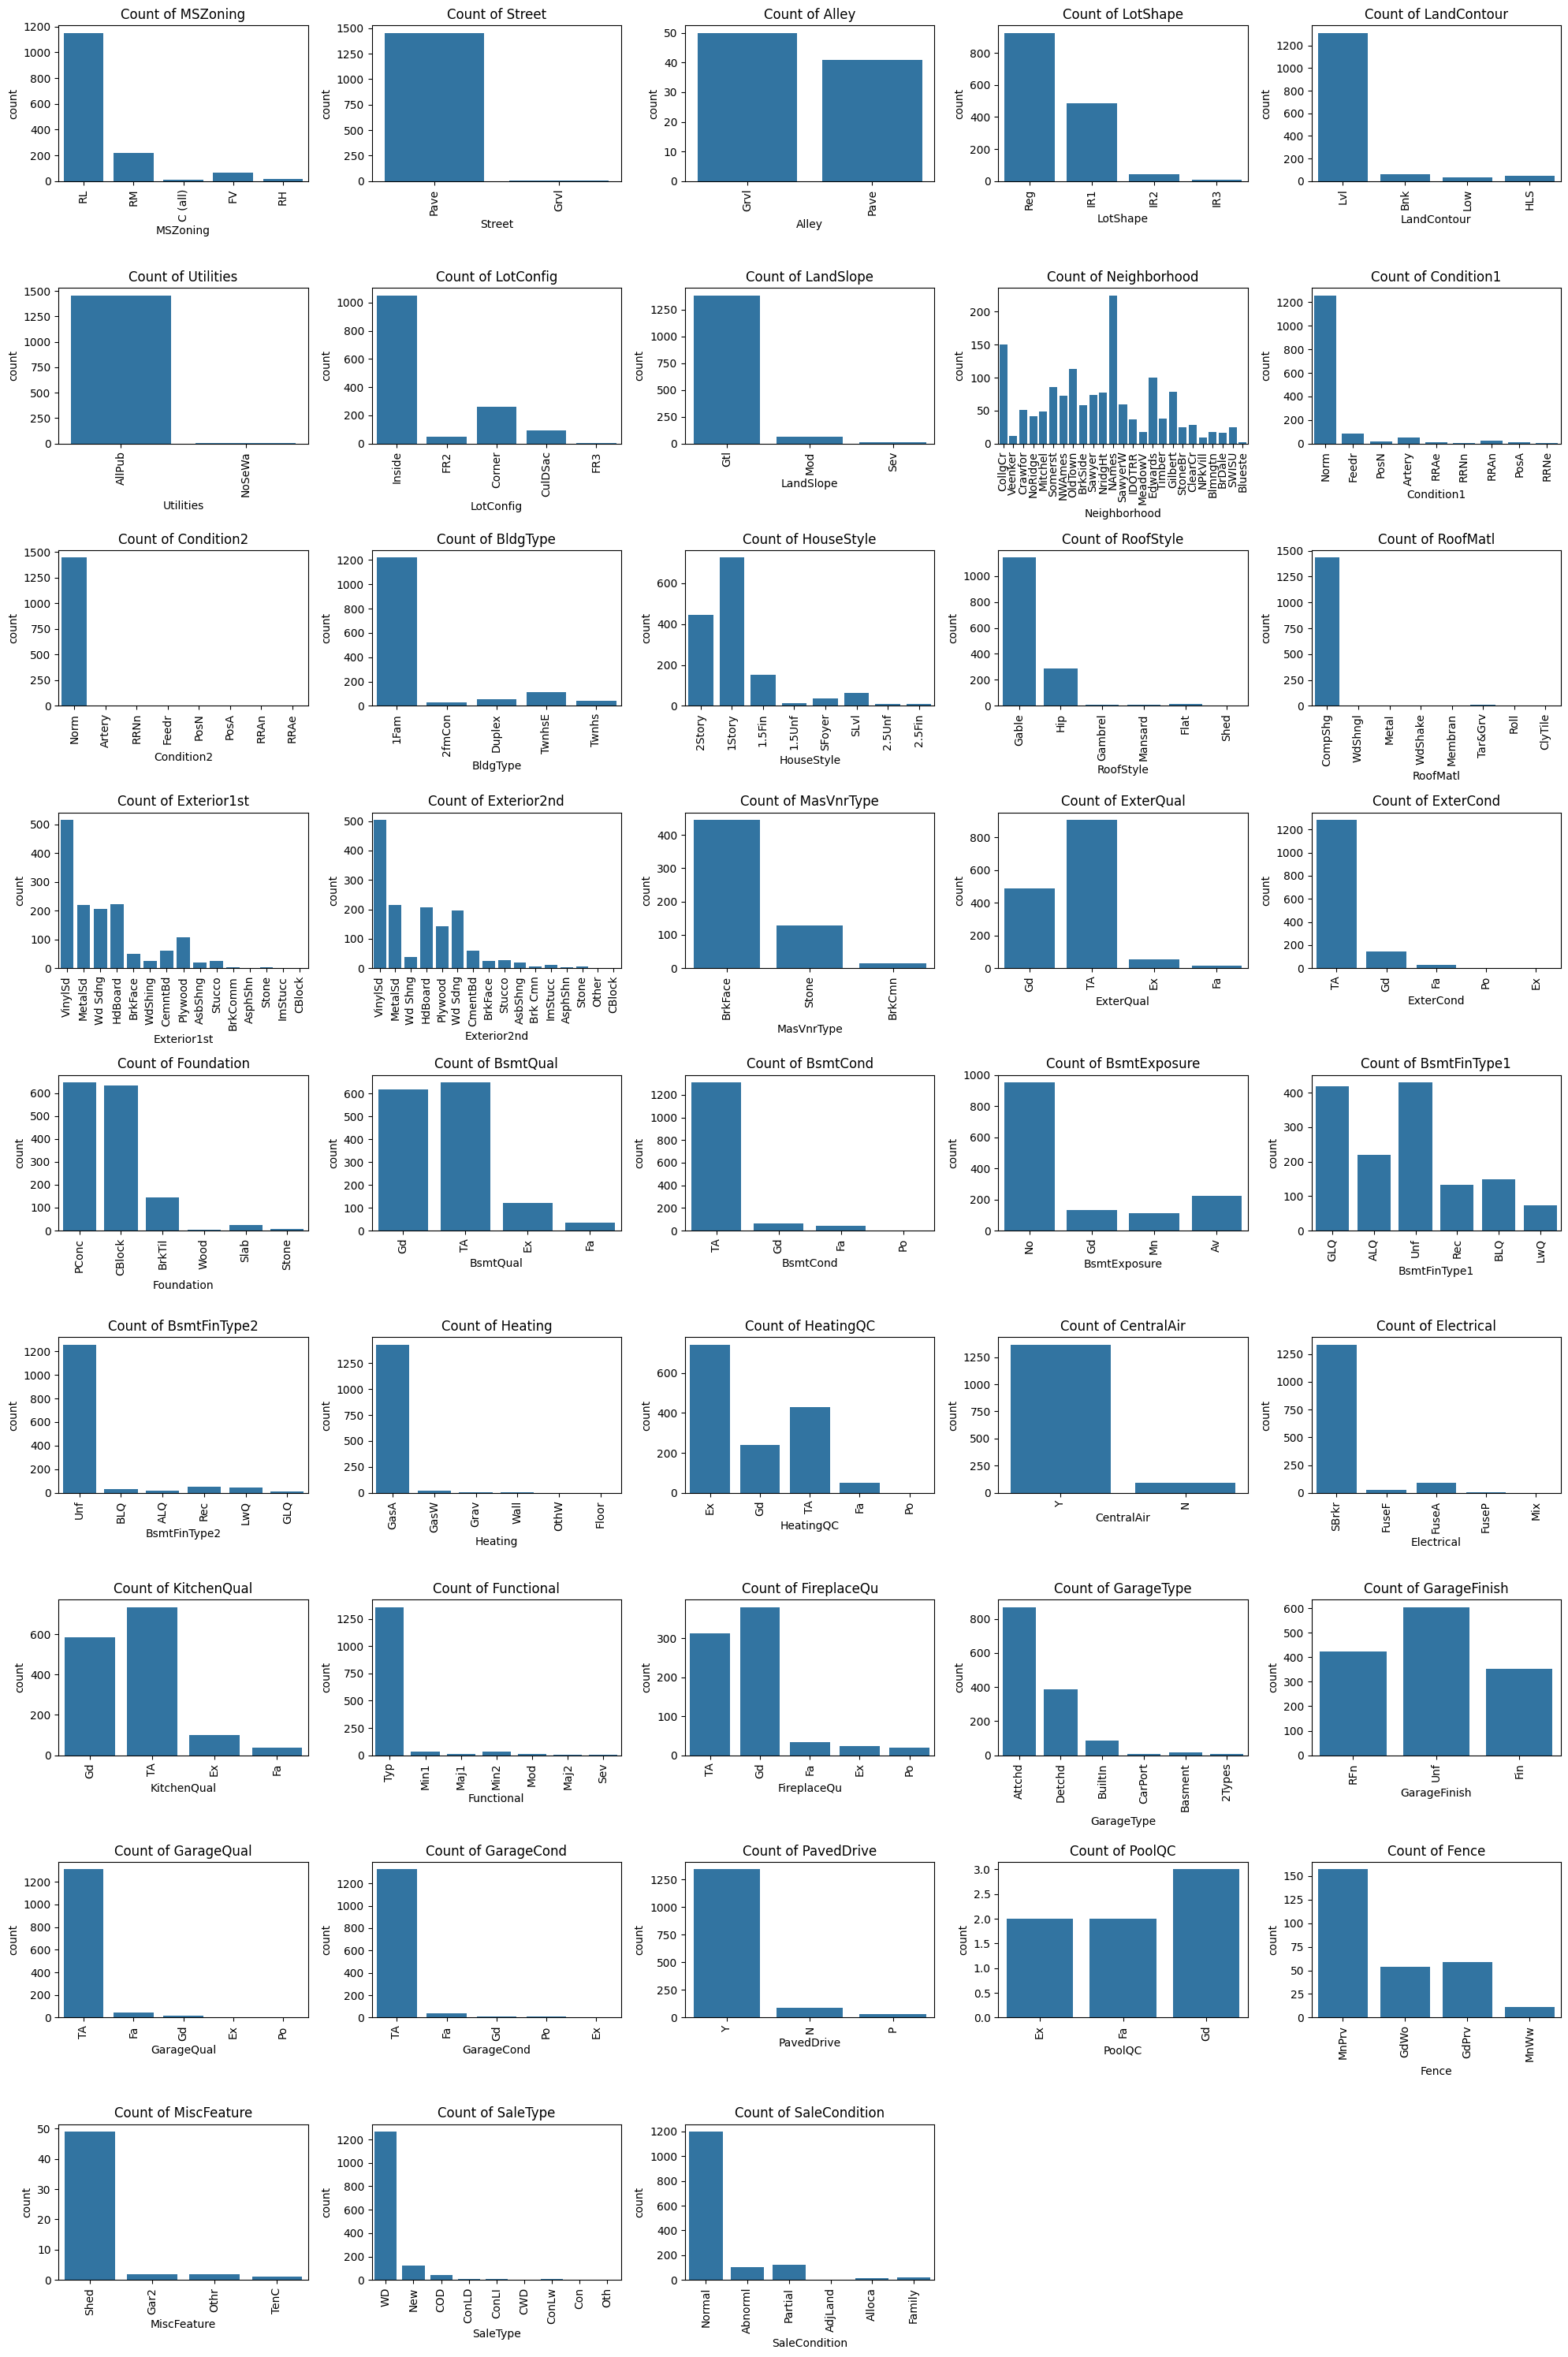

In [29]:
plt.figure(figsize=(20, 30))
plot = 1

for i in cat_col:   
    if plot <= 43:
        plt.subplot(9, 5, plot)
        sns.countplot(x=i, data=df)   
        plt.title(f"Count of {i}")
        plt.xticks(rotation=90 )       
        plot += 1

plt.tight_layout()
plt.show()

## Insights from count plot (catgorical column):
- **MSZoning** : MSZoning's count plot shows clear dominance by RL.There are some rare categories that are important but must be handled carefully due to low sample size.
-  **Neighborhood** : Neighborhood's count plot shows Categories like NAmes and CollgCr dominate, while many neighborhoods appear very rarely. We will likely need to group the rare neighborhoods into an "Other" category before One-Hot Encoding.
- **Condition1** : Condition1's count plot shows clear dominance by Norm (normal Proximity). while many categories appear very rarely. We will likely need to group the rare categories into an "Other" category before One-Hot Encoding 
- **BldgType** :  BldgType's count plot shows clear dominance by  1Fam category.There are some rare categories that are important but must be handled carefully due to low sample size.
- **ExterQual** : ExternalQual's count plot shows good spread accross 2-3 dominant categories.These are highly impactful ordinal features that are crucial to retain.
- **BsmtQual** : BsmtQual's count plot shows that "NA"no basement is primary category.This plot also shows well distributed spread across the remaining quality ratings.
- **BsmtCond** : BsmtCond's count plot shows most houses are with TA means Typical/Average basement condition.

- **KitchenQual** : KitchenQual's count plot shows good spread accross 2-3 dominant categories.These are highly impactful ordinal features that are crucial to retain.
- **CentralAir** : CentralAir's count plot shows extreme class imbalance for pave (>99% in one category). This also shows that they are poor predicotrs so We should consider dropping them or keeping them as binary features only if the rare category is predictive.
- **FireplaceQu** : FireplaceQu's count plot shows a large 'NA' bar (no fireplace) , followed by a reasonable distribution across quality levels.

- **MiscFeature** :MiscFeature's count plot shows that most houses simply do not posssess an alley so We should convert them to binary (Presence/Absence) indicators for modeling.
- **SaleType** : SaleType's count plot is dominated by 'WD' (Warranty Deed - Conventional). There are some rare sale types that should be grouped into an 'Other' category for stability.
- **SaleCondition** : SaleCondition's count plot is dominated by 'Normal'. There are some rare conditions that are highly predictive but have very low counts and should be retained but reviewed for grouping.

### Numerical Feature

#### Hist Plot

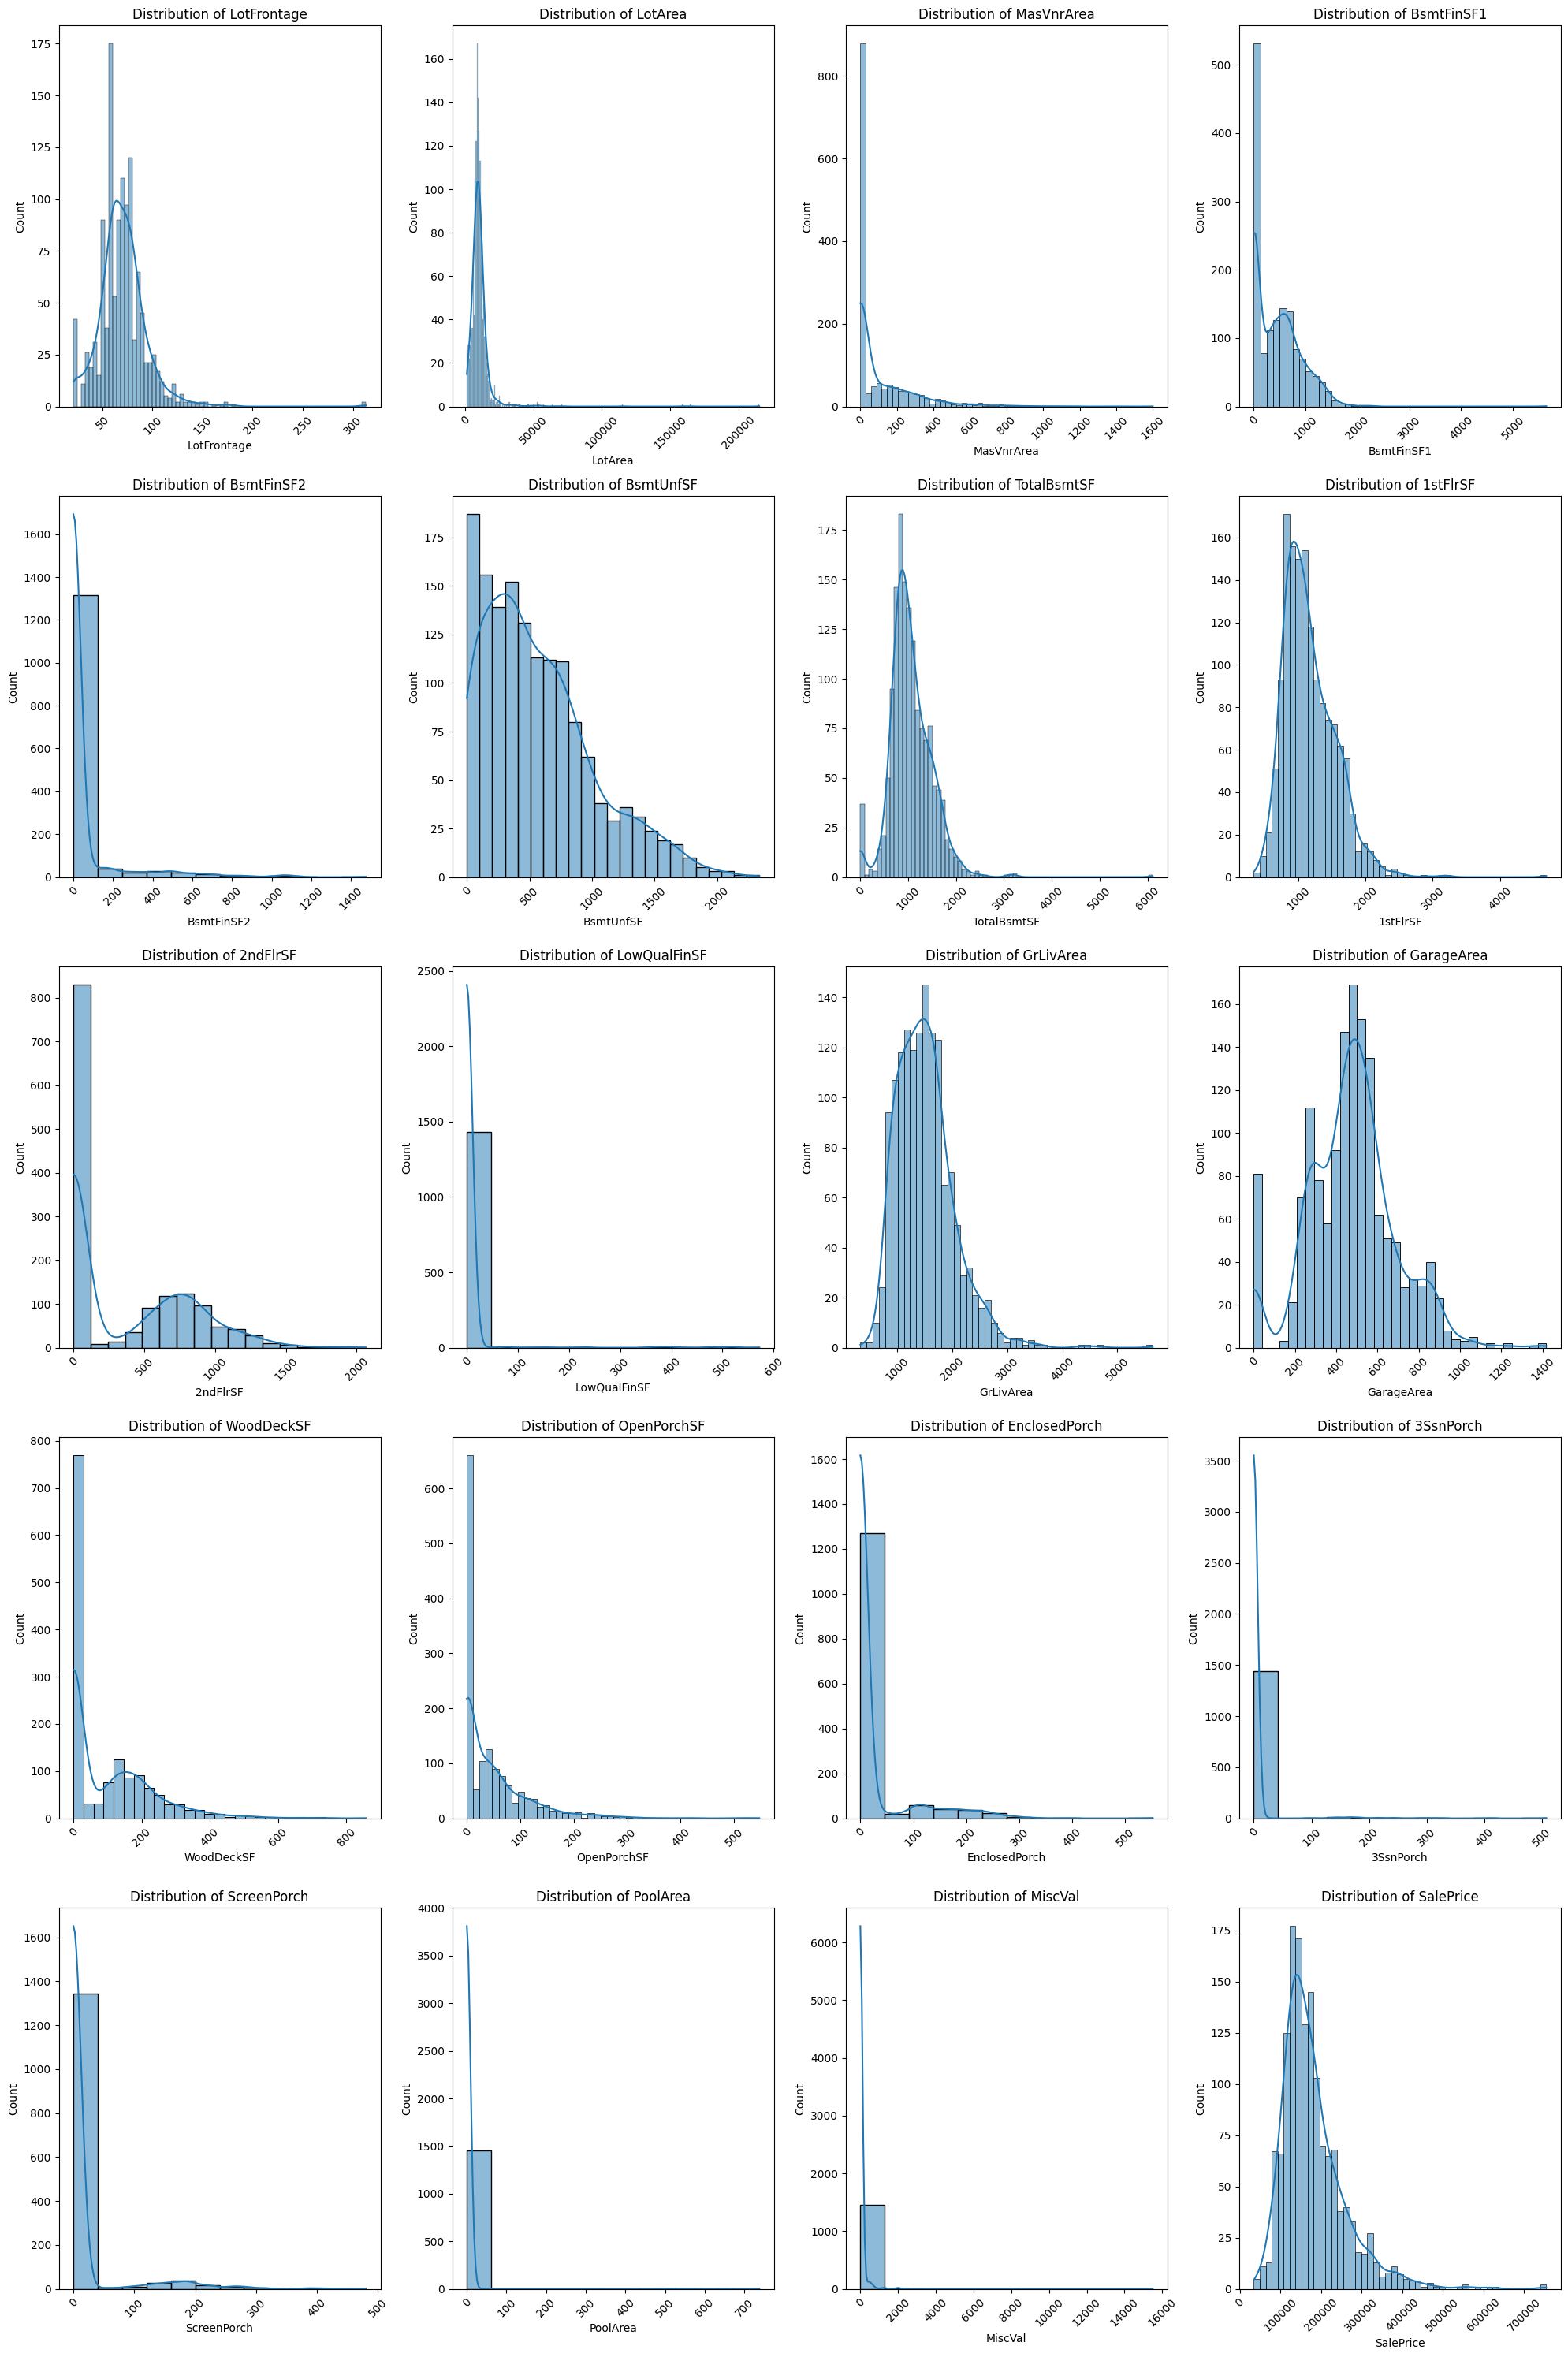

In [30]:
plt.figure(figsize=(20, 30))
plot = 1

for i in num_conti:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.histplot(x=i, data=df,kde=True)   
        plt.title(f"Distribution of {i}")
        plt.xticks(rotation=45)       
        plot += 1

plt.tight_layout()
plt.show()

# Insights from Histplot (Numerical (Continous) Columns) :

- **LotArea** : LotArea's distribution is strongly right skewed .
- **BsmtFinSF1** : BsmtFinSF1's distribution is highly right skewed.
- **TotalBsmtSF** : TotalBsmtSF's distribution is highly right skewed.
- **1stFlrSF** : 1stFlrSF's distribution is highly right skewed.
- **2ndFlrSF** : 2ndFlrSF's distribution is bimodal distribution. This shows that there are high number of houses are single story.
- **GrLivArea** : GrLiveArea's distribution is highly righ skewed.
- **GarageArea** : GarageArea's distribution is slightly left skewed and posibaly bimodal.

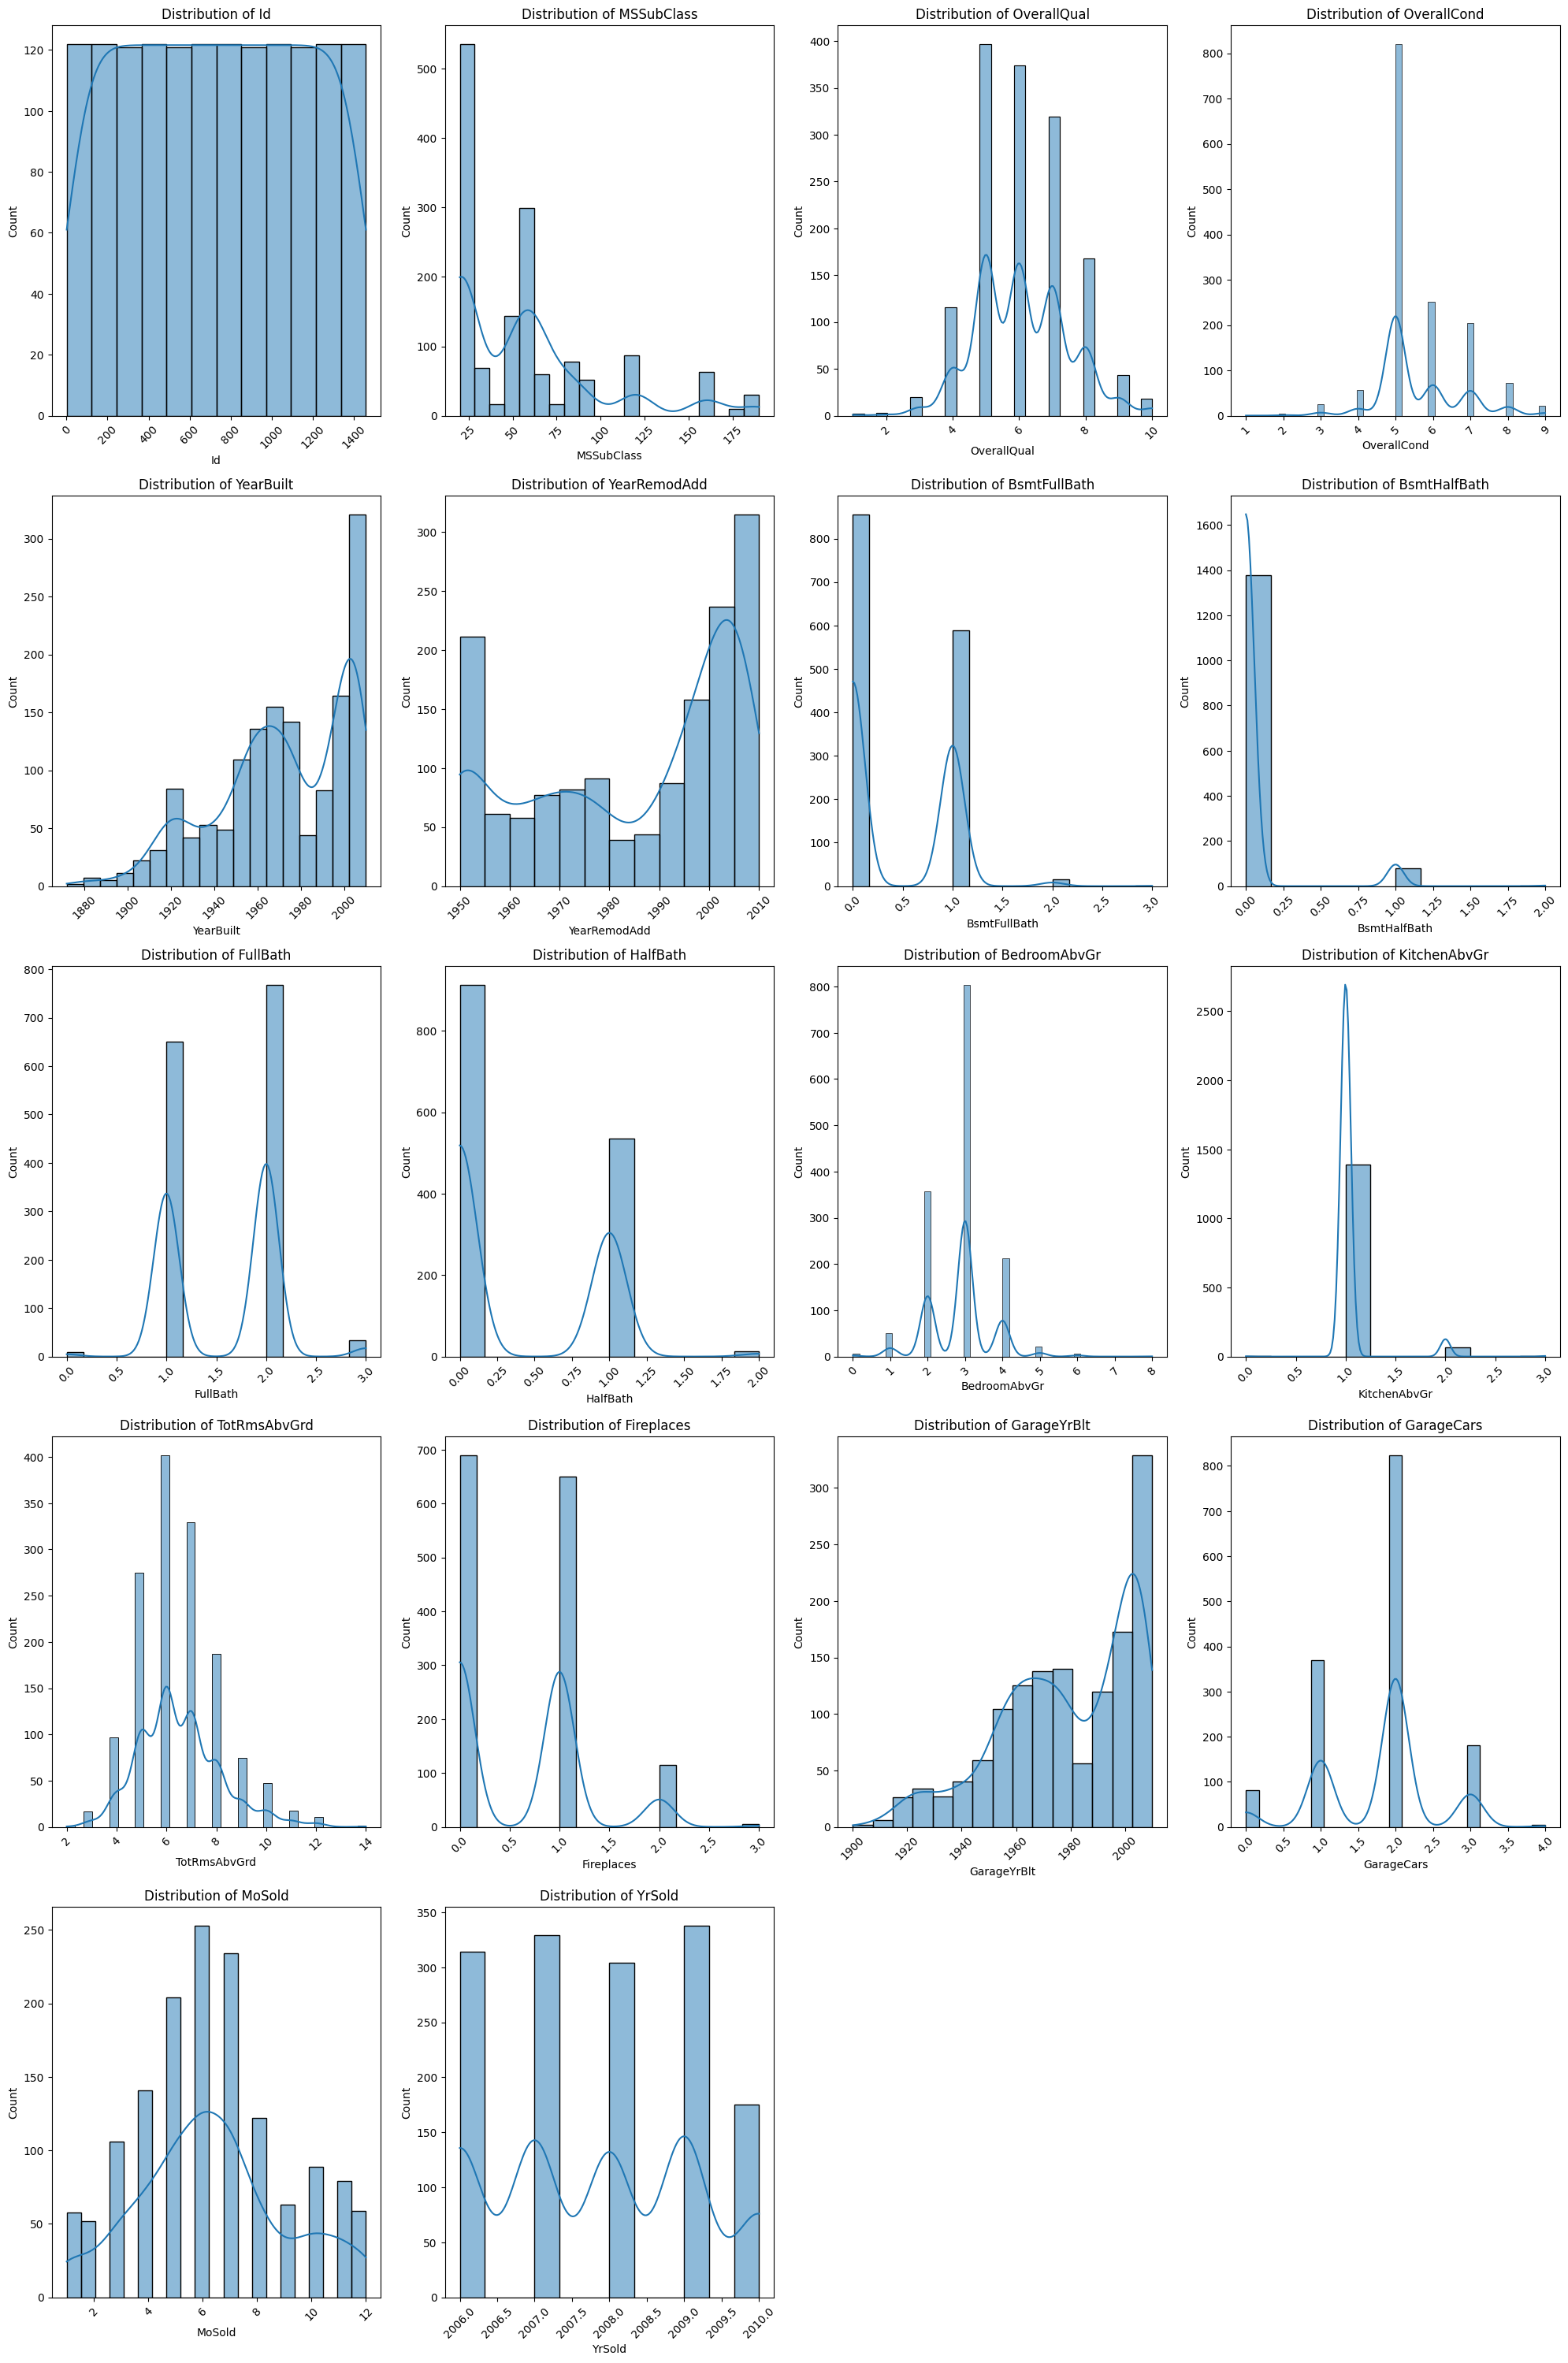

In [31]:
plt.figure(figsize=(20, 30))
plot = 1

for i in num_dis:   
    if plot <= 18:
        plt.subplot(5, 4, plot)
        sns.histplot(x=i, data=df, kde=True)   
        plt.title(f"Distribution of {i}")
        plt.xticks(rotation=45)       
        plot += 1

plt.tight_layout()
plt.show() 

# Insights from Histplot (Numerical (Discrete) Columns) :

- **MSSubClass** : MSSubClass's distribution is discrete , It shows limited number of distinct , ordered , vertical bars.
- **OverallQual** : OverallQual's distribution is discrete , It shows limited number of distinct , ordered , vertical bars.
- **OverallCond** : OverallCond's distribution is discrete , It shows limited number of distinct , ordered , vertical bars.
- **YearBuilt** : YearBuilt's distribution is  probabaly left skewed or bimodal .Most houses in the dataset were built recently, with the distribution showing a high concentration near the newest year.
- **FullBath** : FullBath's distribution is discrete and slightlt left-skewed, This shows that the most common number for full bathroom is 1 and 2 ,there are fewer number of houses with full bathroom number 3 or more.
- **BedroomAbvGr** : BedroomAbvGr's distribution is centrally distributed  around three bedrooms. This shows that there is high number of houses with 2,3 or 4 numbers of bedrooms.
- **TotRmsAbvGrd** : TotRmsAbvGrd's distribution is cenrally distributed .This shows that there are high number of houses that have room in range of 5 to 8 rooms. There are highest number of houses with 6 rooms.
- **GarageCars** : GarageCars's distribution is dicrete and left sewed. This shows that there are most garages with 2 cars.

## Bivariate Analyisis

### Categorical Feature

#### Bar Plot

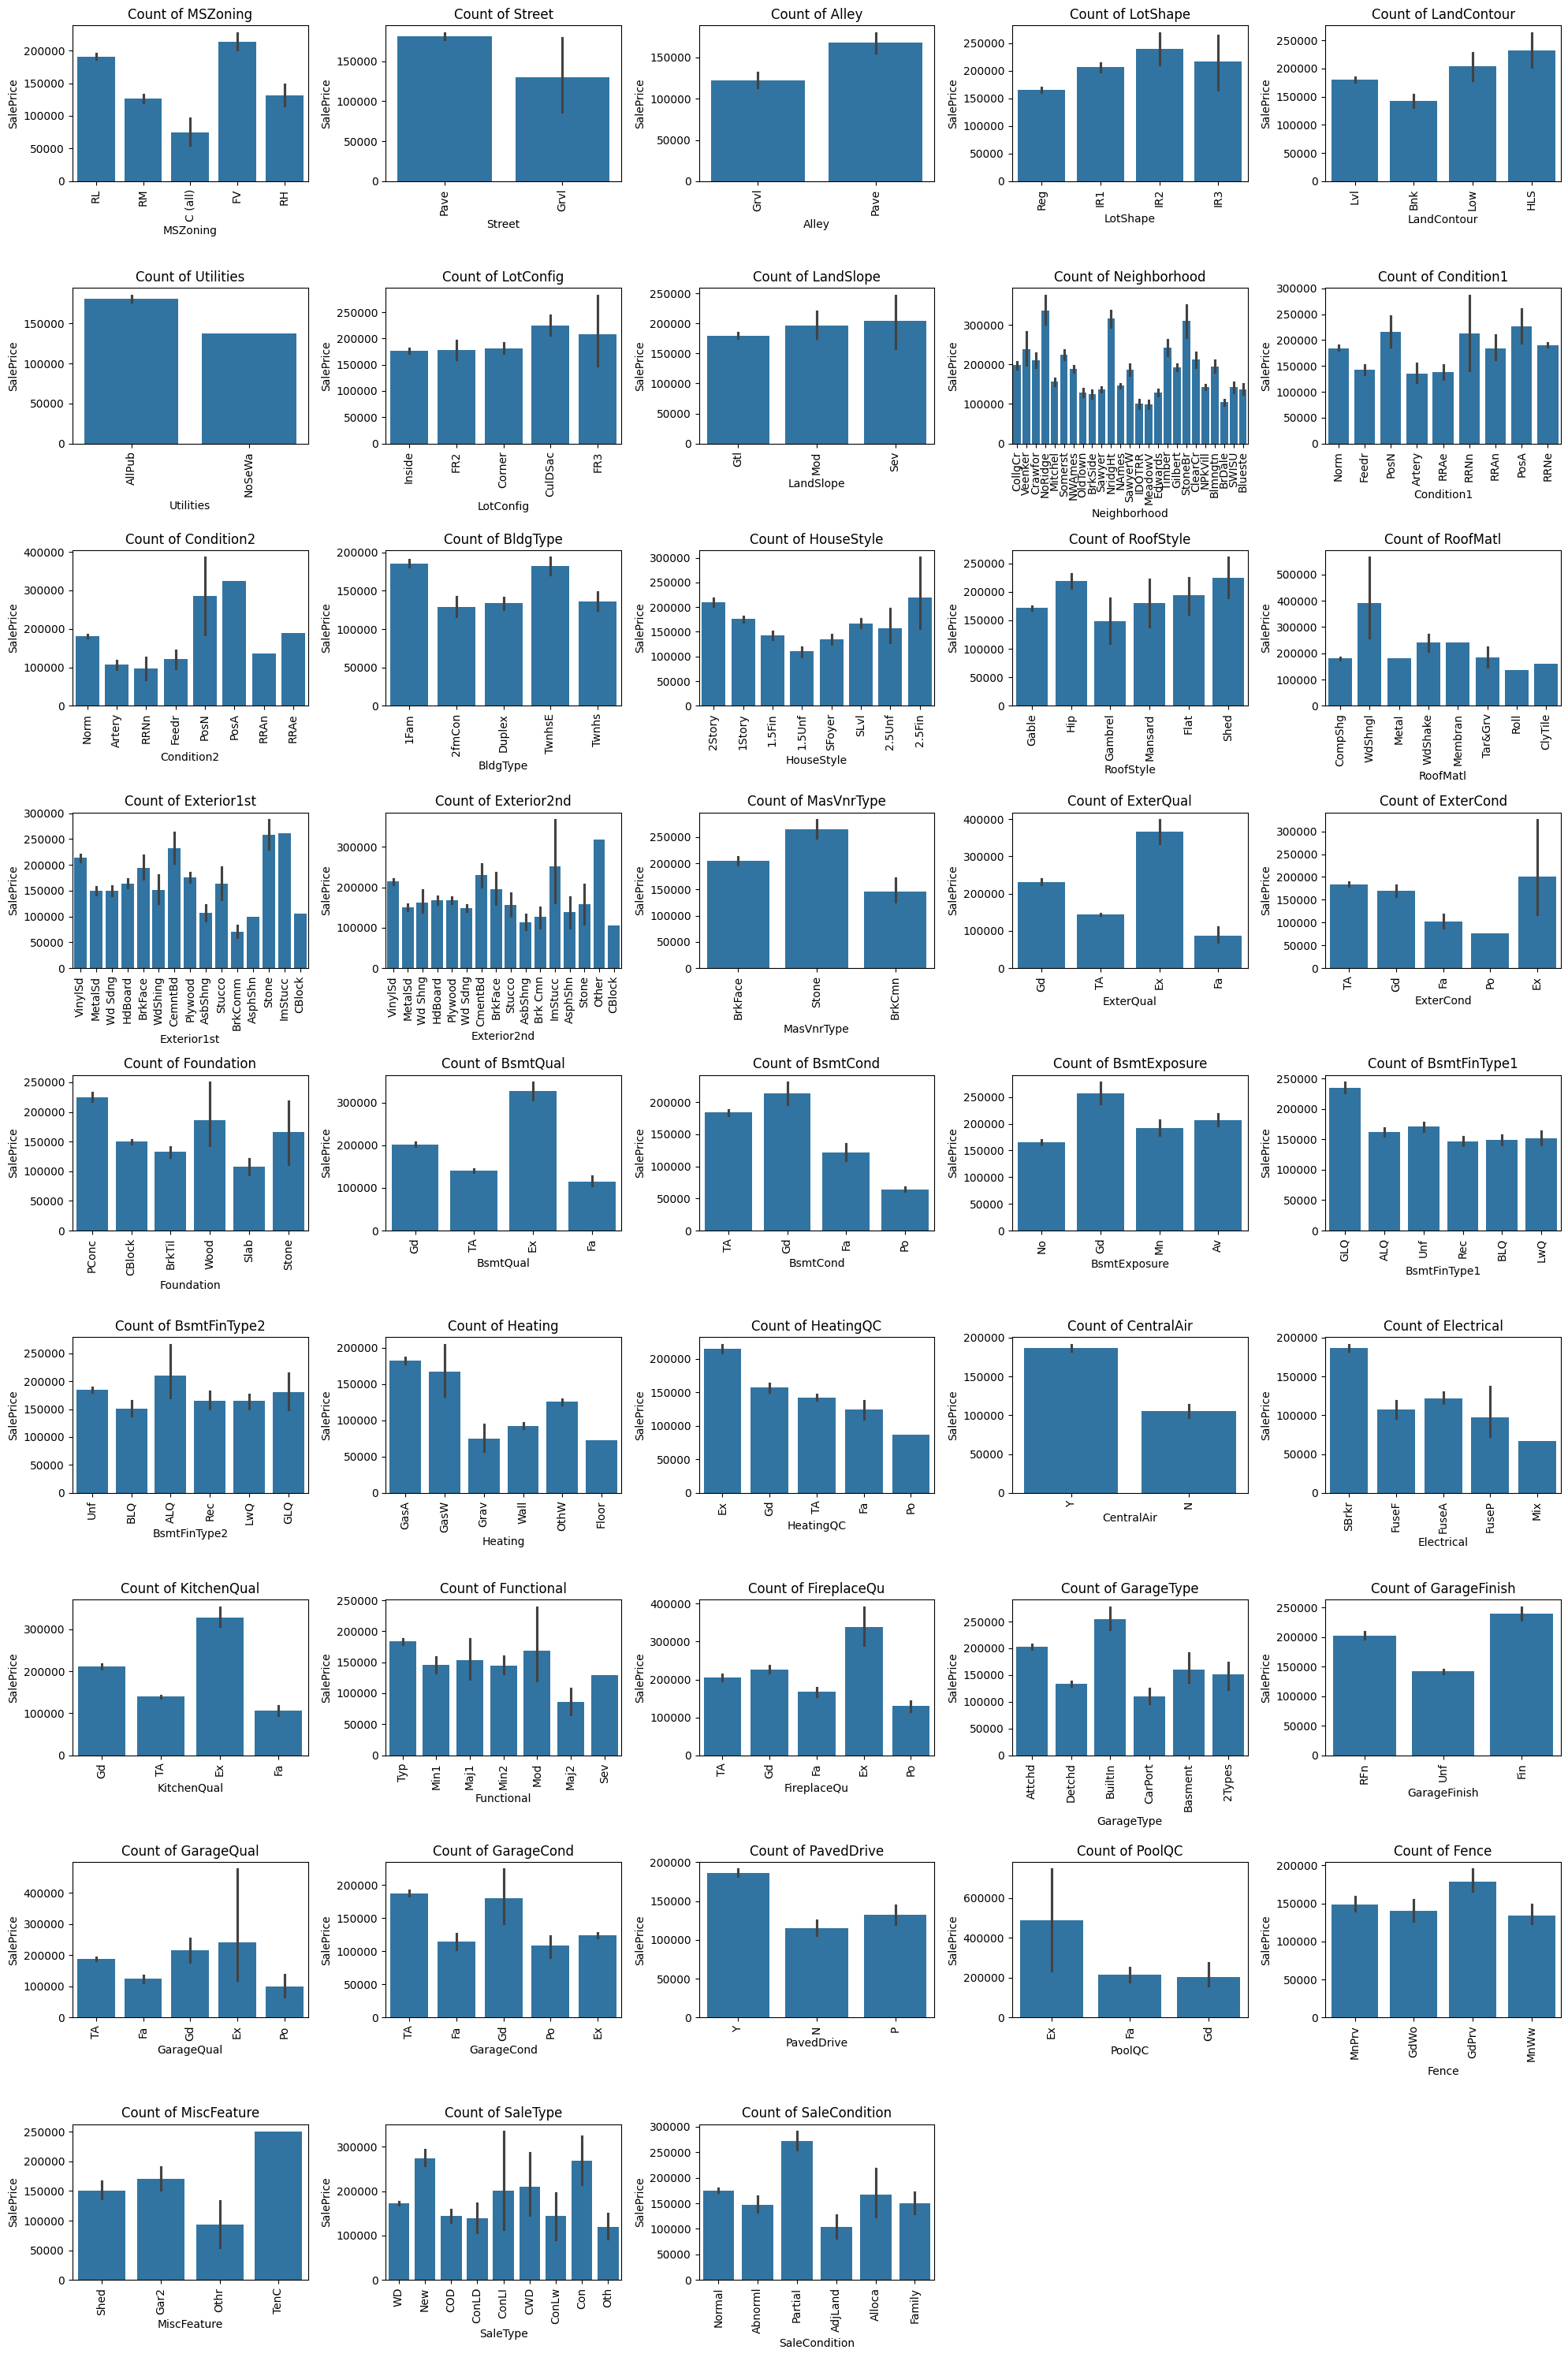

In [32]:
plt.figure(figsize=(20, 30))
plot = 1

for i in cat_col:   
    if plot <= 43:
        plt.subplot(9, 5, plot)
        sns.barplot(x=i, y="SalePrice", data=df)   
        plt.title(f"Count of {i}")
        plt.xticks(rotation=90)       
        plot += 1

plt.tight_layout()
plt.show()

# Insights from Barplot (catgorical Columns) :

- **MSZoning** : The bar plot of MSZoning vs SalePrice shows that houses in FV and RL zones have higher average sale prices compared to RM or commercial zones. This suggests that zoning directly affects neighborhood quality and demand. Hence, MSZoning has a strong effect on SalePrice.

- **Neighborhood** :
The bar plot of Neighborhood vs SalePrice shows that NridgHt and NoRidge areas have the highest prices, while IDOTRR and MeadowV are the lowest. This reflects location prestige. Hence, Neighborhood has a strong effect on SalePrice.

- **Condition1** :
The bar plot of Condition1 vs SalePrice shows that houses near parks or positive areas (PosA, PosN) sell for more than those near railroads or busy streets. This suggests environment influences comfort. Hence, Condition1 has a moderate effect on SalePrice.

- **BldgType** –
The bar plot of BldgType vs SalePrice shows that single-family detached homes have higher prices than duplexes or townhouses. This indicates that privacy and space matter. Hence, BldgType has a strong effect on SalePrice.

- **ExterQual** –
The bar plot of ExterQual vs SalePrice shows that houses with excellent or good exterior quality are priced much higher. This reflects strong build quality impact. Hence, ExterQual has a strong effect on SalePrice.

- **BsmtQual** –
The bar plot of BsmtQual vs SalePrice shows that excellent basements have much higher prices. This suggests basement livability matters. Hence, BsmtQual has a strong effect on SalePrice.

- **Functional** –
The bar plot of Functional vs SalePrice shows that typical or moderate functionality homes sell higher. Poor layouts reduce desirability. Hence, Functional has a moderate effect on SalePrice.

- **CentralAir** –
The bar plot of CentralAir vs SalePrice shows that houses with central air are worth more. This suggests modern comfort features increase demand. Hence, CentralAir has a strong effect on SalePrice.

- **Utilities** :
The bar plot of Utilities vs SalePrice shows that most houses have public utilities (AllPub) with no major price difference. This indicates little variation. Hence, Utilities have no noticeable effect on SalePrice.

- **SaleCondition** –
The bar plot of SaleCondition vs SalePrice shows that Normal and Partial sales have the highest prices. This suggests regular sales reflect trust and quality. Hence, SaleCondition has a strong effect on SalePrice.





### Numerical Features

#### Scatter Plot

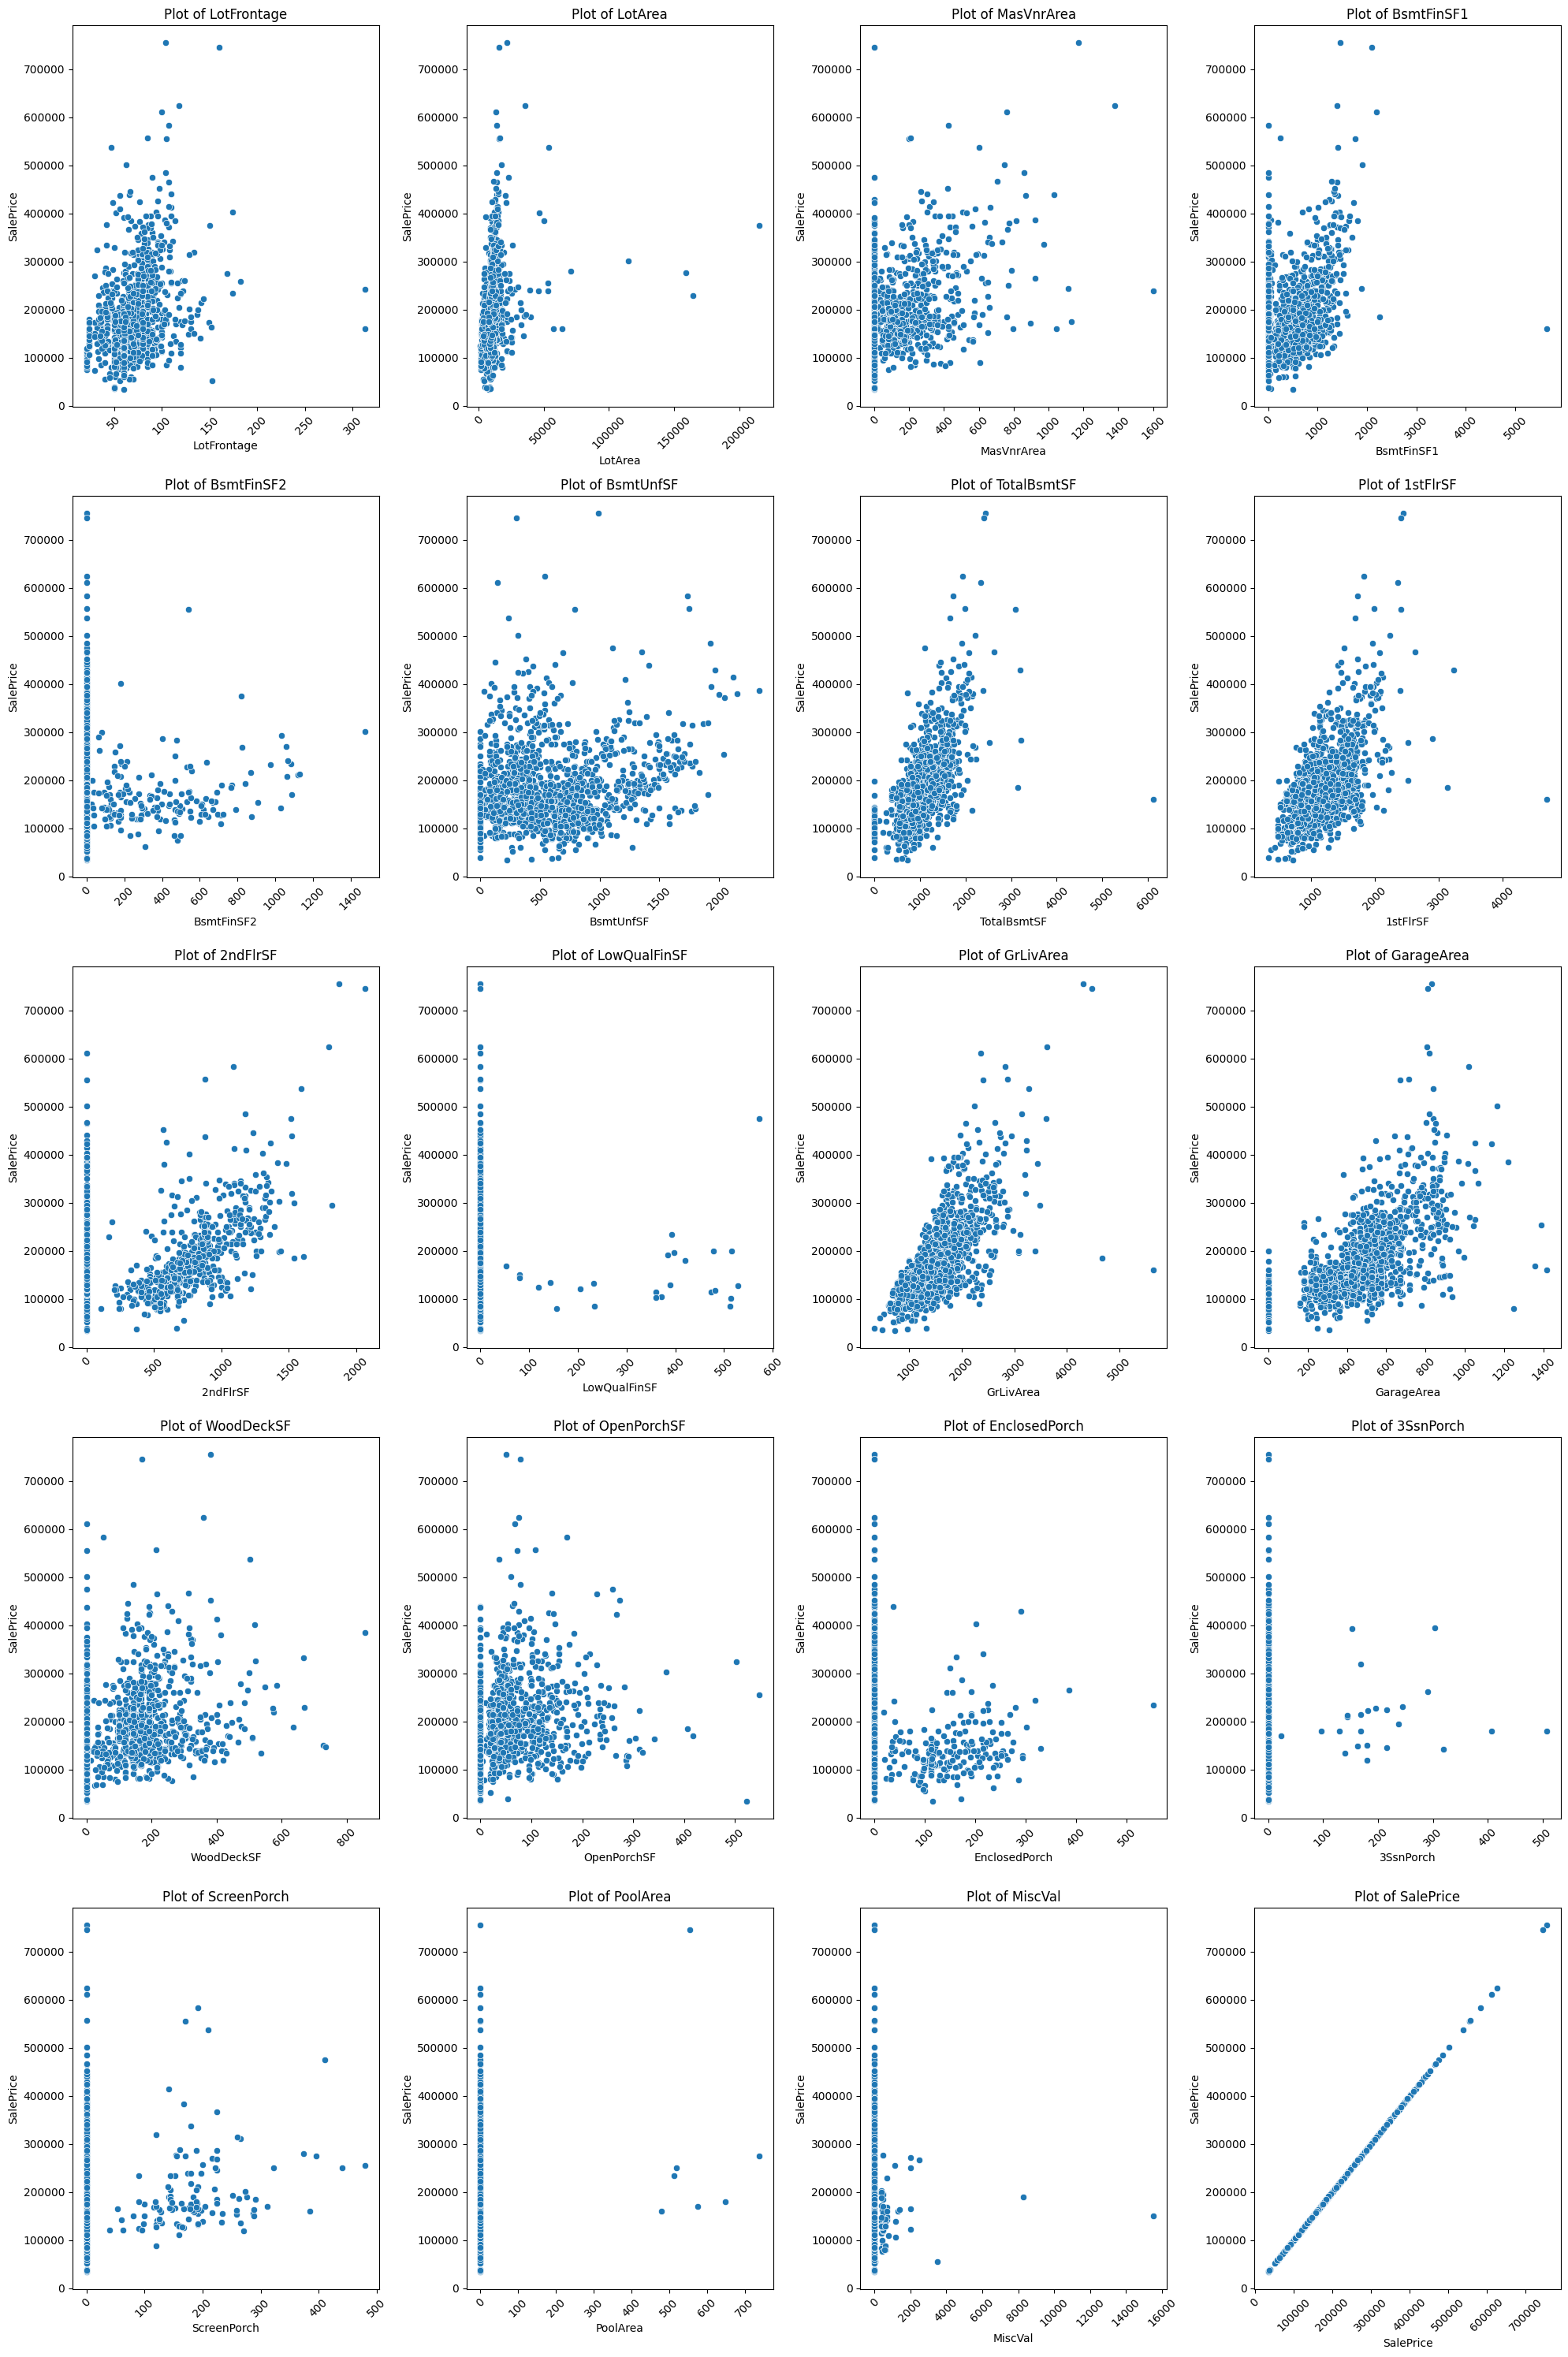

In [33]:
plt.figure(figsize=(20, 30))
plot = 1

for i in num_conti:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.scatterplot(x=i, y="SalePrice", data=df)   
        plt.title(f"Plot of {i}")
        plt.xticks(rotation=45)       
        plot += 1

plt.tight_layout()
plt.show()

## Insight from scatterplot (Numerical (Continous) Columns) :
  
- **LotArea vs SalePrice** : Bigger lot size can be more expensive than other one. Most of houses are exist in small lot & large lots don’t always guarantee a higher price.

- **BsmtFinSF1 vs SalePrice** : Finished basement area can increase the over all price.

- **TotalBsmtSF vs SalePrice** : There is strong positive relationship with target variable. Bigger basement space leads to higher prices.

- **1stFlrSF vs SalePrice** : There is strong positive relationship with target variable. More space of first floor impact positive on SalePrice.

- **2ndFlrSF vs SalePrice** : There is same as first floor but not  that much impact on sale price.

- **GrLivArea vs SalePrice** : There is clear positive trend. It is one of the most stongest predictor for SalePrice.
  
- **GarageArea vs SalePrice** : Another strong predictor on SalePrice. Larger garage area leads to higher SalePrice.

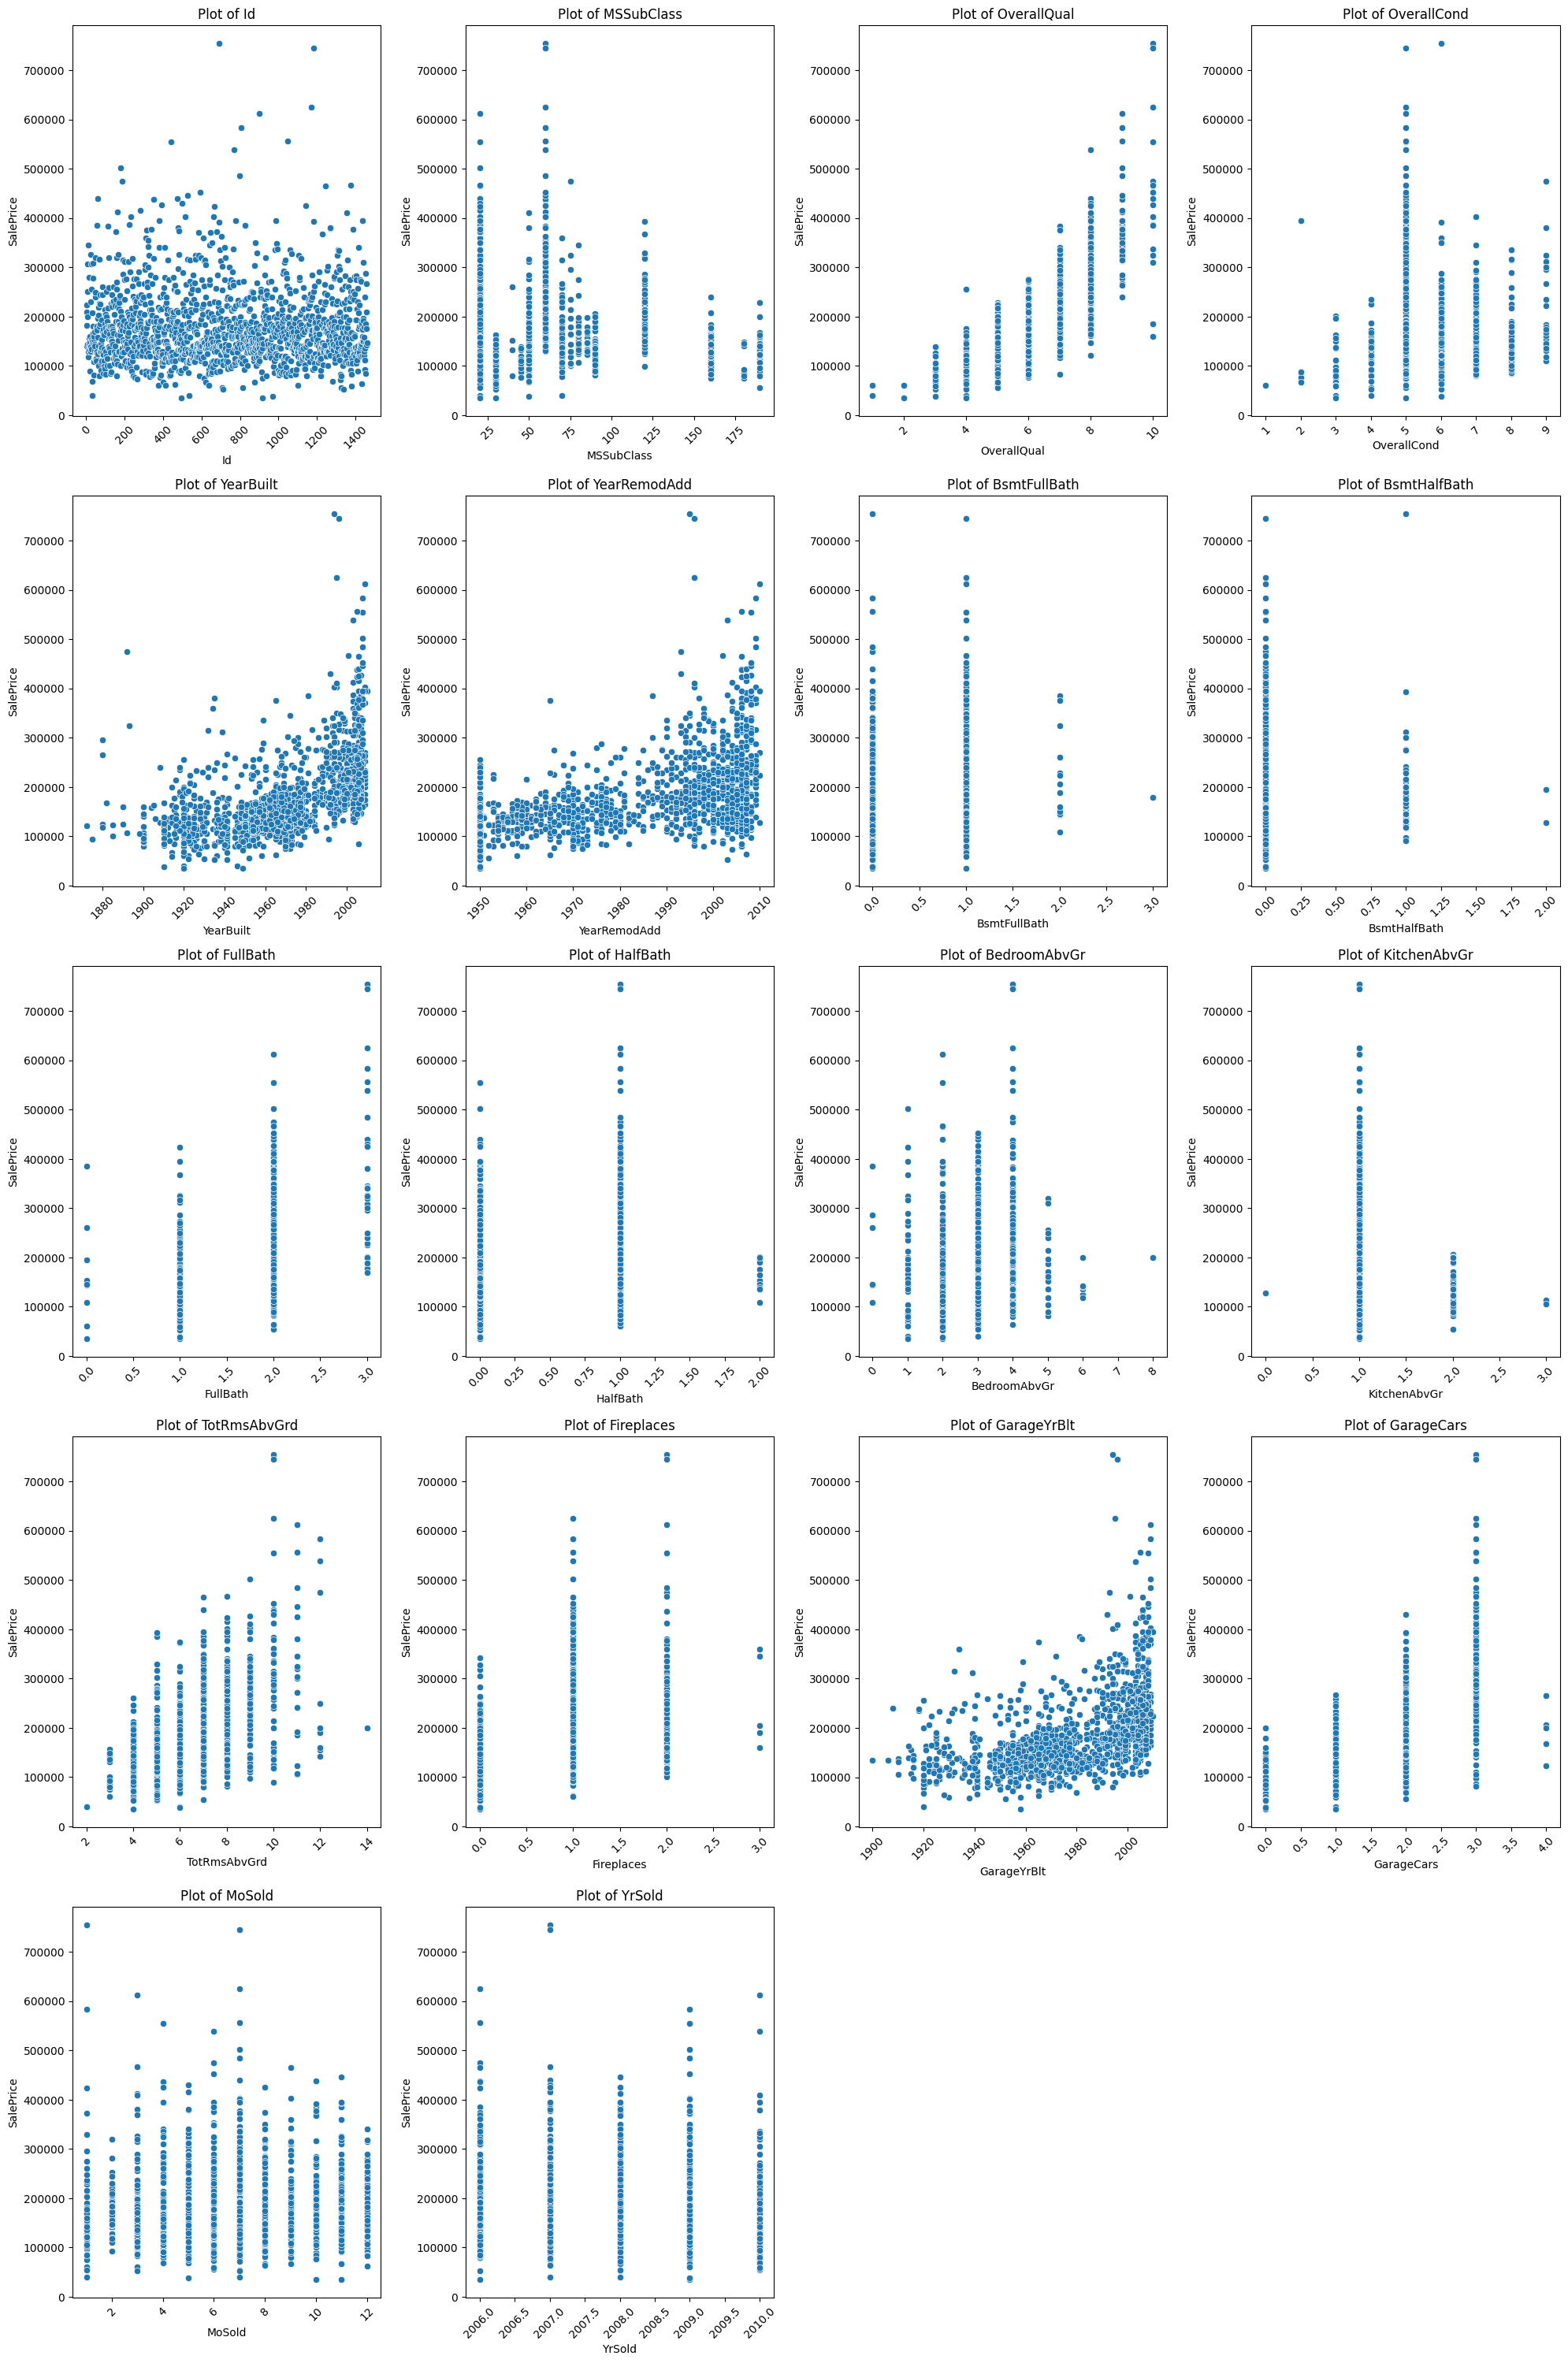

In [34]:
plt.figure(figsize=(20, 30))
plot = 1

for i in num_dis:   
    if plot <= 18:
        plt.subplot(5, 4, plot)
        sns.scatterplot(x=i, y="SalePrice", data=df)
        plt.title(f"Plot of {i}")
        plt.xticks(rotation=45)
        plot += 1

plt.tight_layout()
plt.show()

##  Insights from scatter plot (Numerical (discrete) Columns) :

- **MSSubClass vs SalePrice** : It define that which type of class are more chances for sale and buyer prefer the most.

- **OverallQual vs SalePrice** : we can easily say that house price will be increase as per overallqual's value increase. This is one of the strongest predictor of Sale price.

- **OverallCond vs SalePrice** : House condition matter on sale price but not the most. Good quality houses tend to more sales.

- **YearBuilt vs SalePrice** : Newly built houses are more expensive and buyer would like to pay more for new ones.

- **YearRemodAdd vs SalePrice** : Newly ronovated houses have more higher prices. renovations can improve house prices.

- **BsmtFullBath vs SalePrice** : More full bathroom can slightly increase price. but there is not strong relationship.

- **BsmtHalfBath vs SalePrice** : There is not any clear impact on SalePrice.

- **FullBath vs SalePrice** : More full bathrooms typically leads to higher house price.

- **HalfBath vs SalePrice** : It will adds a bit  of values . but not major effect appear here.

- **BedroomAbvGr vs SalePrice** : The numbers of bedrooms doesn't strongly corelated to price. means Quality matters more than bedroom counts.

- **KitchenAbvGr vs SalePrice** : There is not any information from this because most of houses have 1 kitchen.

- **TotRmsAbvGrd vs SalePrice** : More rooms above ground generally leads to high impact on SalePrice.

- **Fireplaces vs SalePrice** : More fireplace can slightly affected to SalePrice.

- **GarageYrBlt vs SalePrice** : Newly built garages linked to higher home prices.

- **GarageCars vs SalePrice** : Larger space for more cars impact more on SalePrice.

- **MoSold vs SalePrice** : There is not any clear trend.

- **YrSold vs SalePrice** : Sale price doesn’t vary much by year, indicating market was relatively stable in the given period.

## Outliers : Boxplot 

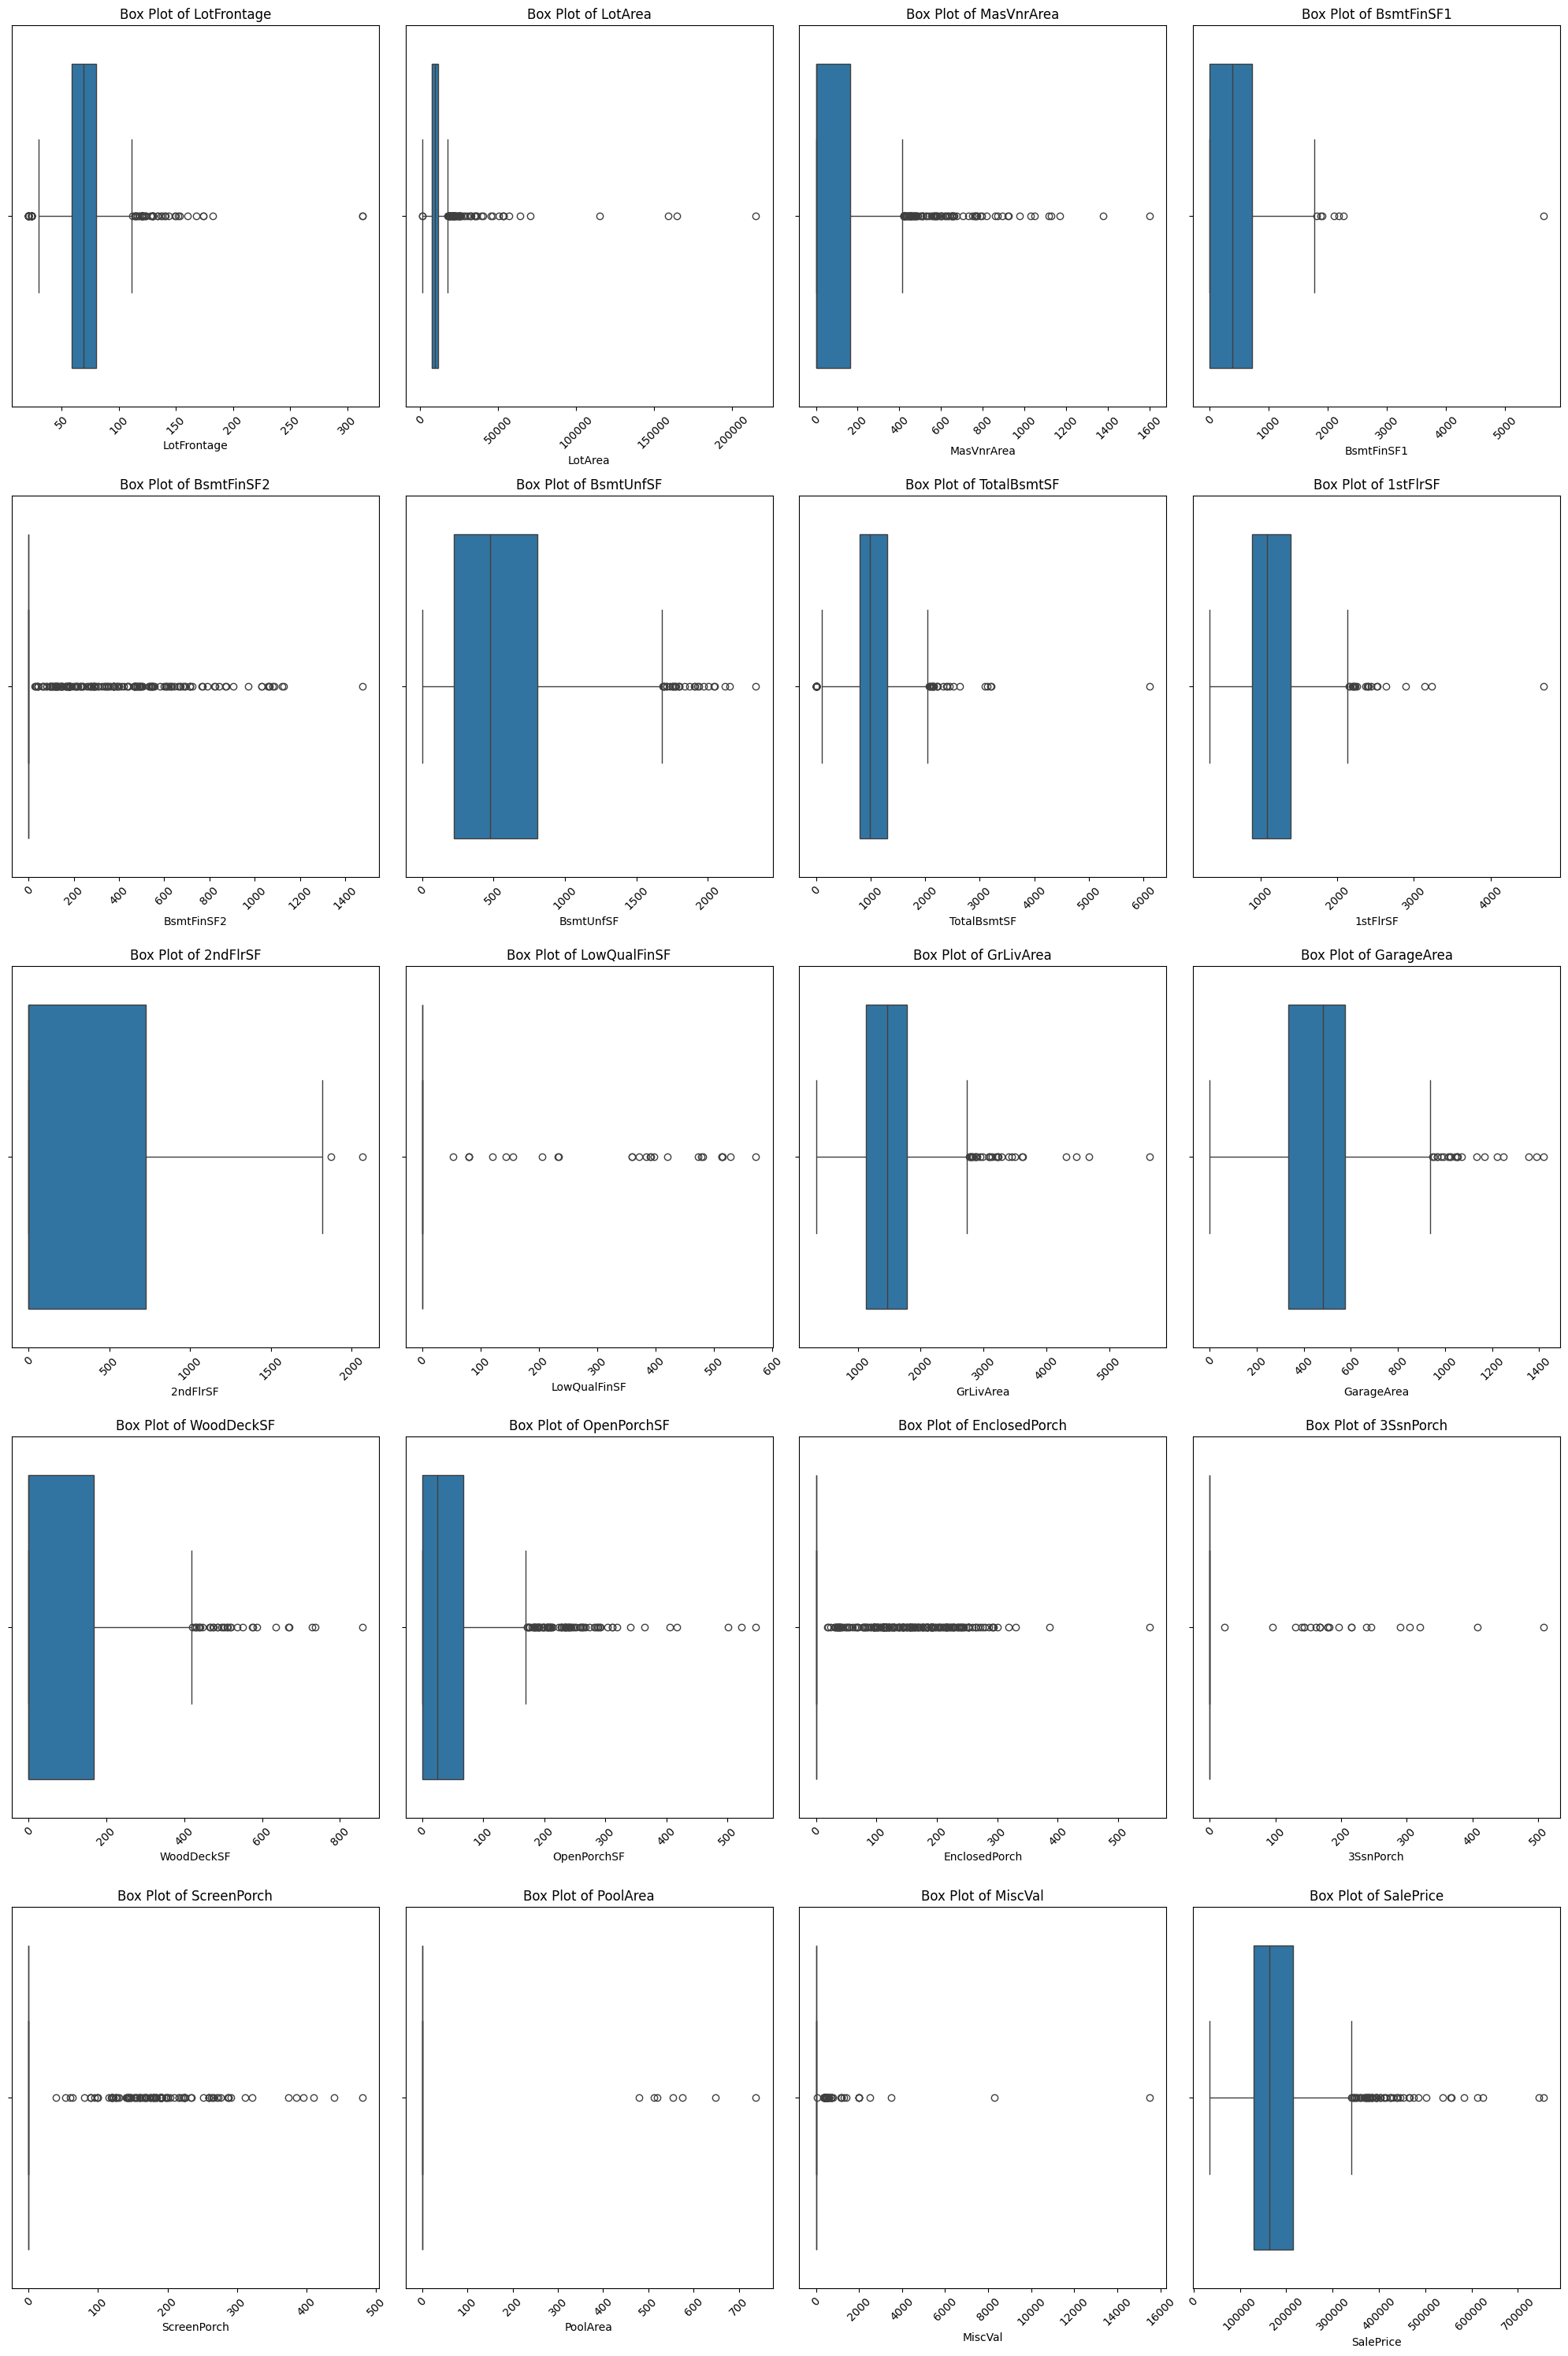

In [35]:
plt.figure(figsize=(20, 30))
plot = 1

for i in num_conti:   
    if plot <= 20:
        plt.subplot(5, 4, plot)
        sns.boxplot(x=i, data=df)   
        plt.title(f"Box Plot of {i}")
        plt.xticks(rotation=45)       
        plot += 1

plt.tight_layout()
plt.show()

#### Insights from Box Plots

- **Box of LotArea**: LotArea shows a large amount of extreme outliers. For most houses, there are at least moderate sized lots but few properties exist with extremely large lot areas; this indicates a very high degree of variation in the land size.

- **Box of BsmtFinSF1**: BsmtFinSF1 displays some outliers, but overall appears to have fairly compact distribution. In general, most homes report modest sized finished basements, however some homes have much larger basement areas when they are finished.

- **Box of TotalBsmtSF**: TotalBsmtSF again shows several outliers. While a large number of basements share a normal range of size or completely below average basement size, it accounts for basement coefficient variance and few homes have basements much larger. 

- **Box of 1stFlrSF**: 1stFlrSF displays a right skew with several outliers. Most homes are smaller on the first floor but larger luxury houses have much larger square footages higher than reported in the box.

- **Box of 2ndFlrSF**: 2ndFlrSF displays many homes with limited or nonexistent second-floor space, while others have very large second floors, creating outliers. This suggests great variability in house design styles.

- **Box of GrLivArea**: GrLivArea has right-skewed outliers. Most homes have average living area, while several larger homes have very high living areas compared to the others.

- **Box of GarageArea**: GarageArea displays several outlying data points. While many homes have a standard-sized garage, some larger homes have much larger garages, suggesting variability in property type or high-end luxury.

###  Feature Engineering :

#### Data PreProcessing

####   Checking for Duplicate Rows

In [36]:
duplicates = df.duplicated().sum()
duplicates

0

Insights :

- There are zero duplicate rows in this dataset

#### Null value Handling

In [37]:
missing = df.isna().sum().sort_values(ascending=False)
missing

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

Insights :

- There are columns with >50 % null values like Alley , PooolQC , Fence , MiscFeature and MasVnrType.So we need to drop this columns.
- Id column is for just showing the index so not useful for this model prediction So we need to drop it.
- There are features like Street and Utilities that have extreme class imbalance so we need to drop that also.

In [38]:
drop_null = ["Alley","PoolQC","Fence","MiscFeature",'MasVnrType']

In [39]:
drop_id = ["Id"]

In [40]:
print(df[["Street"]].value_counts())
print("----------------------------------")
print(df[["Utilities"]].value_counts())

Street
Pave      1454
Grvl         6
Name: count, dtype: int64
----------------------------------
Utilities
AllPub       1459
NoSeWa          1
Name: count, dtype: int64


In [41]:
drop_columns = ['Street', 'Utilities']

In [42]:
df.drop(drop_null ,inplace=True,axis=1)
df.drop(drop_id,inplace=True,axis=1)
df.drop(drop_columns ,inplace=True,axis=1)

In [43]:
df

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch  \
0       Inside       Gtl      CollgCr       Norm  ...             0         0   
1          FR2       Gtl      Veenker      Feedr  ...             0         0   
2       Inside       Gtl      CollgCr       Norm  ...             0         0   
3       Corner       Gtl      Crawfor       Norm  ...           272         0   
4          FR2       Gtl      NoRidge       Norm  ...             0         0   
...        ...       ...          ...        ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert       Norm  ...             0         0   
1456    Inside       Gtl       NWAmes       Norm  ...             0         0   
1457    Inside       Gtl      Crawfor       Norm  ...             0         0   
1458    Inside       Gtl        NAmes       Norm  ...           112         0   
1459    Inside       Gtl      Edwards       Norm  ...             0         0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0              0         0        0       2    2008       WD        Normal   
1              0         0        0       5    2007       WD        Normal   
2              0         0        0       9    2008       WD        Normal   
3              0         0        0       2    2006       WD       Abnorml   
4              0         0        0      12    2008       WD        Normal   
...          ...       ...      ...     ...     ...      ...           ...   
1455           0         0        0       8    2007       WD        Normal   
1456           0         0        0       2    2010       WD        Normal   
1457           0         0     2500       5    2010       WD        Normal   
1458           0         0        0       4    2010       WD        Normal   
1459           0         0        0       6    2008       WD        Normal   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 73 columns]

In [44]:
missing = df.isna().sum().sort_values(ascending=False)
missing

FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
GarageFinish     81
GarageQual       81
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 73, dtype: int64

Insights :

- There are remaining columns  with < 50 % null values so we gonna handle that features by replacing null values with "None" , mode , mean , median in columns.

In [45]:
num_to_change = ['LotFrontage','MasVnrArea','GarageYrBlt']
cat_to_change = ['GarageFinish','GarageCond','FireplaceQu','GarageType','GarageQual','BsmtFinType2','BsmtCond','BsmtQual','Electrical', 'BsmtExposure', 'BsmtFinType1']

In [46]:
for i in num_to_change:
    df.loc[df[i].isnull(), i] = df[i].median()
    
for i in cat_to_change:
    df.loc[df[i].isnull(),i] = df[i].mode()[0]

In [47]:
# Checking if there are any null values remaining 
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 73, dtype: int64

In [48]:
df

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0             60       RL         65.0     8450      Reg         Lvl   
1             20       RL         80.0     9600      Reg         Lvl   
2             60       RL         68.0    11250      IR1         Lvl   
3             70       RL         60.0     9550      IR1         Lvl   
4             60       RL         84.0    14260      IR1         Lvl   
...          ...      ...          ...      ...      ...         ...   
1455          60       RL         62.0     7917      Reg         Lvl   
1456          20       RL         85.0    13175      Reg         Lvl   
1457          70       RL         66.0     9042      Reg         Lvl   
1458          20       RL         68.0     9717      Reg         Lvl   
1459          20       RL         75.0     9937      Reg         Lvl   

     LotConfig LandSlope Neighborhood Condition1  ... EnclosedPorch 3SsnPorch  \
0       Inside       Gtl      CollgCr       Norm  ...             0         0   
1          FR2       Gtl      Veenker      Feedr  ...             0         0   
2       Inside       Gtl      CollgCr       Norm  ...             0         0   
3       Corner       Gtl      Crawfor       Norm  ...           272         0   
4          FR2       Gtl      NoRidge       Norm  ...             0         0   
...        ...       ...          ...        ...  ...           ...       ...   
1455    Inside       Gtl      Gilbert       Norm  ...             0         0   
1456    Inside       Gtl       NWAmes       Norm  ...             0         0   
1457    Inside       Gtl      Crawfor       Norm  ...             0         0   
1458    Inside       Gtl        NAmes       Norm  ...           112         0   
1459    Inside       Gtl      Edwards       Norm  ...             0         0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
0              0         0        0       2    2008       WD        Normal   
1              0         0        0       5    2007       WD        Normal   
2              0         0        0       9    2008       WD        Normal   
3              0         0        0       2    2006       WD       Abnorml   
4              0         0        0      12    2008       WD        Normal   
...          ...       ...      ...     ...     ...      ...           ...   
1455           0         0        0       8    2007       WD        Normal   
1456           0         0        0       2    2010       WD        Normal   
1457           0         0     2500       5    2010       WD        Normal   
1458           0         0        0       4    2010       WD        Normal   
1459           0         0        0       6    2008       WD        Normal   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 73 columns]

####  Outlier Handling

In [49]:
num_conti = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
]

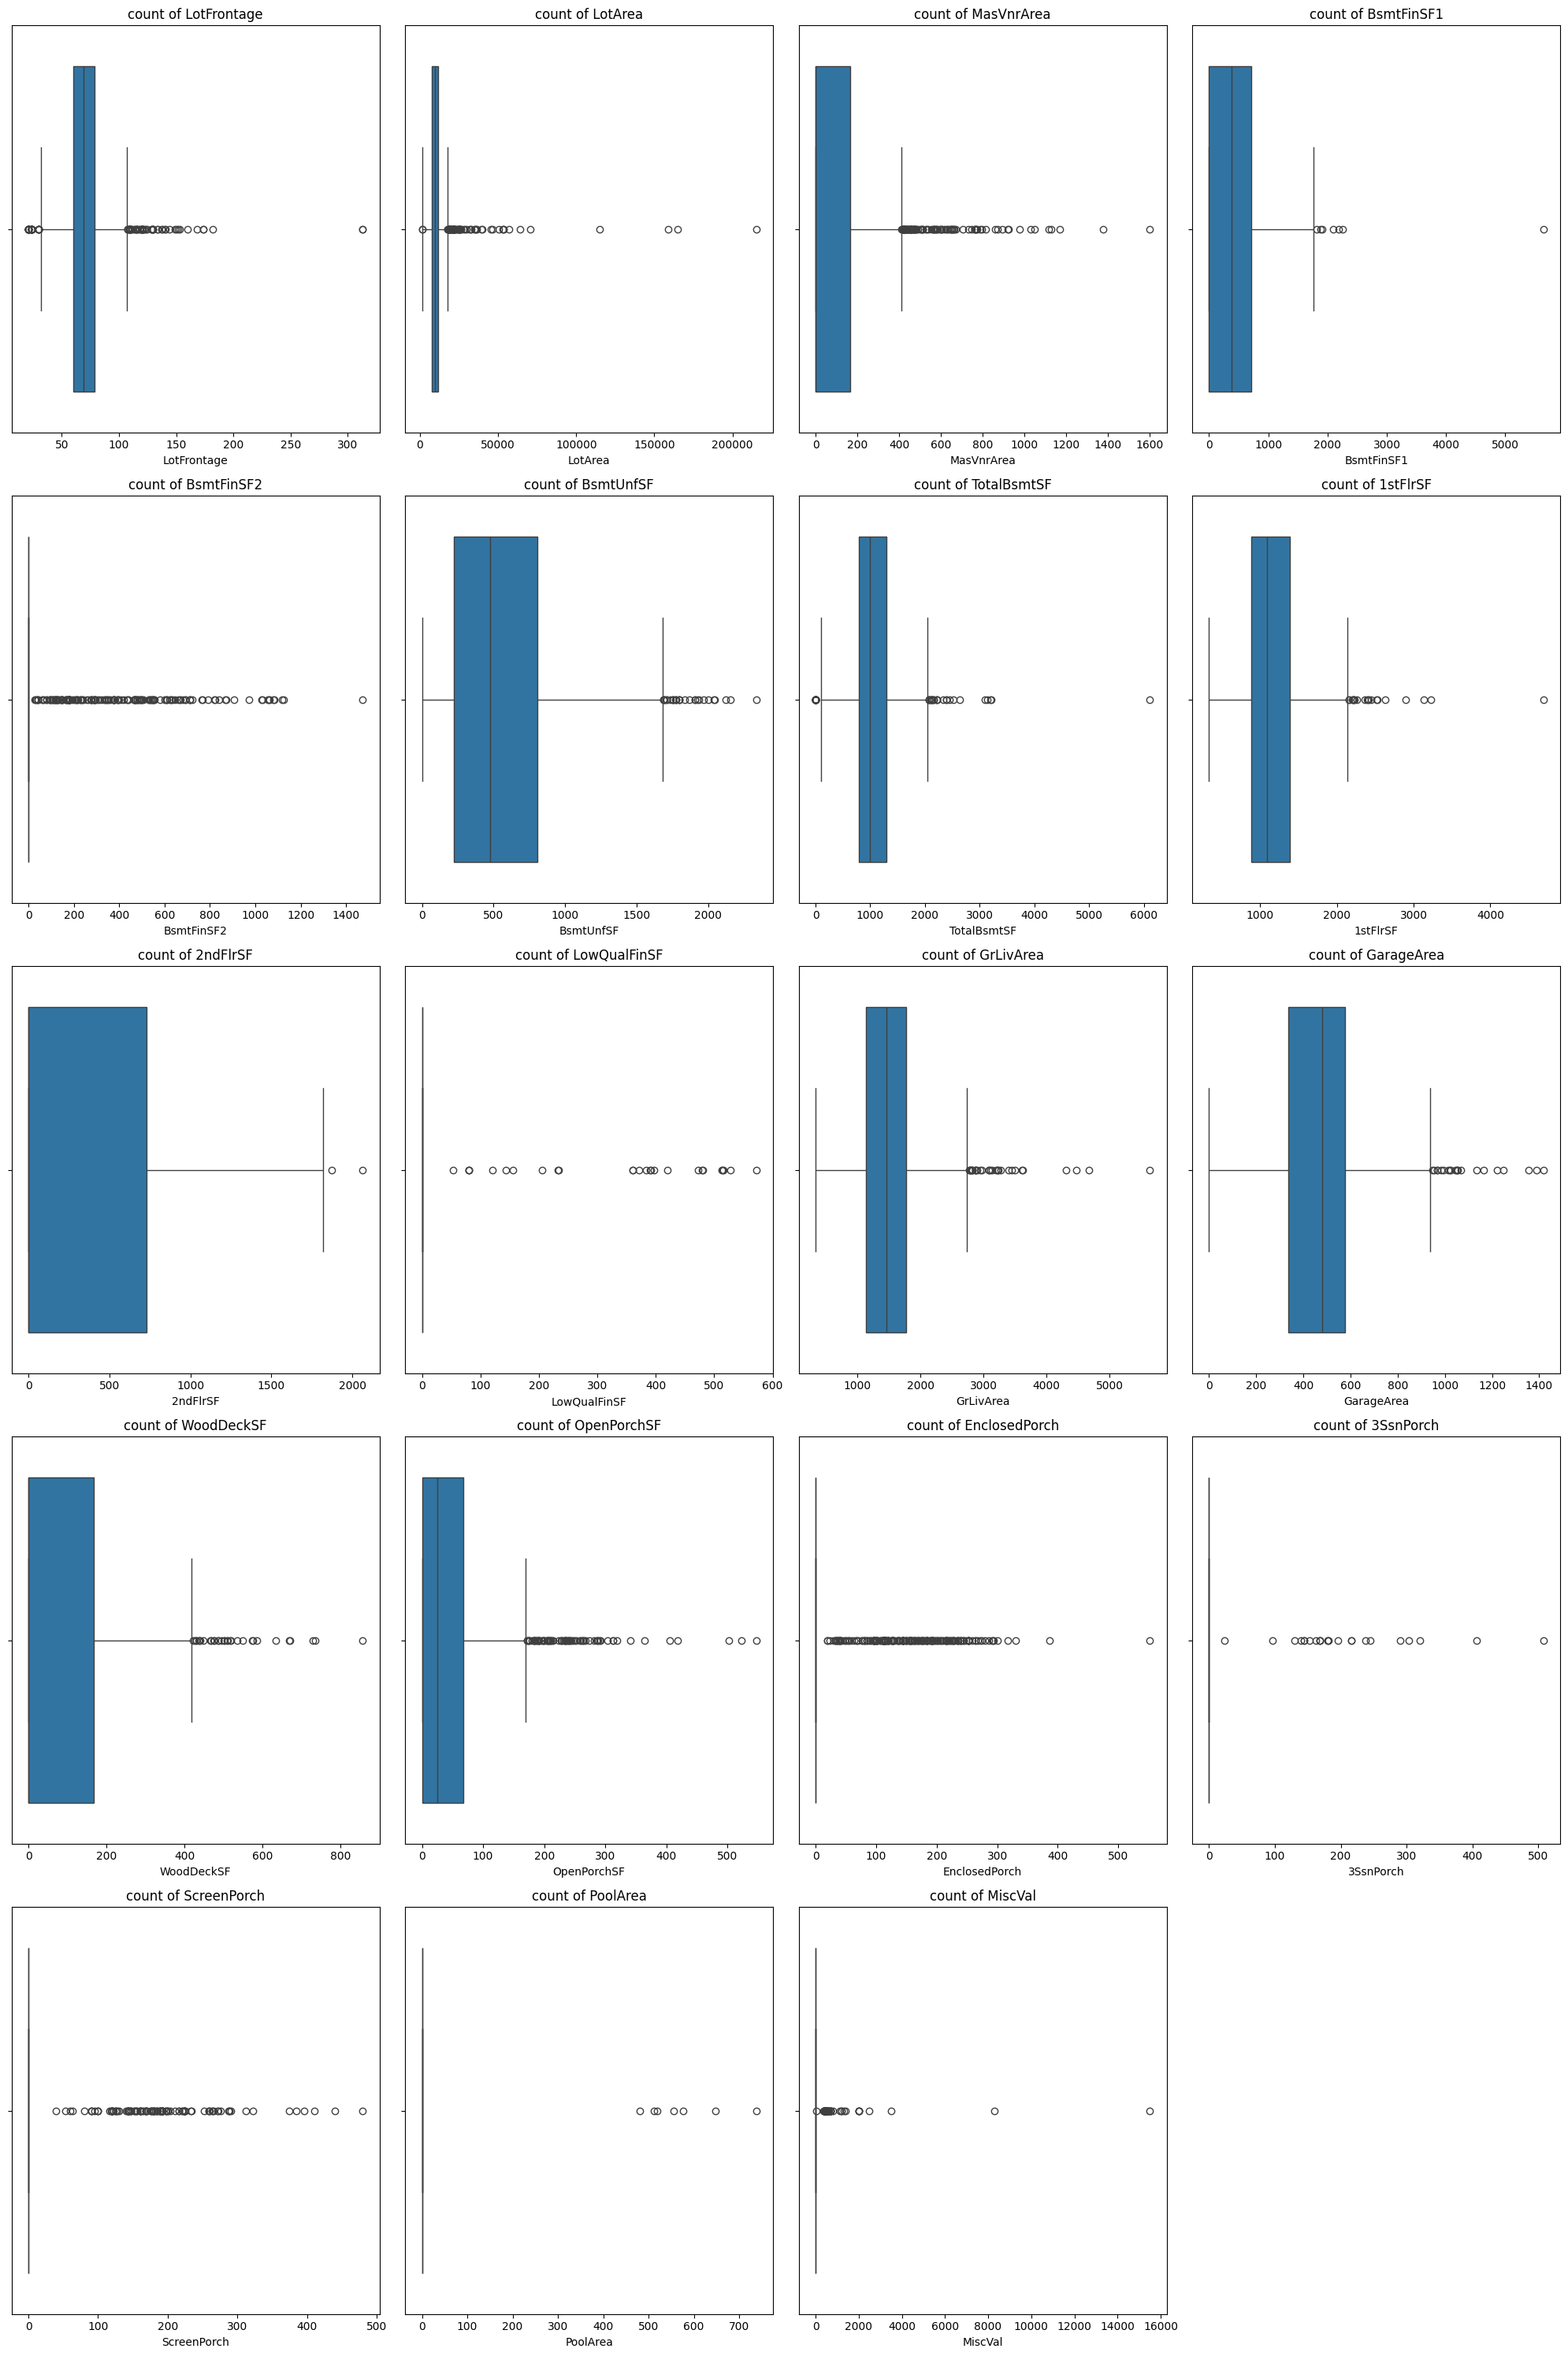

In [50]:
plt.figure(figsize=(20,30))
plot = 1 

for i in num_conti :
    if plot <= 20:
        plt.subplot(5,4,plot)
        sns.boxplot(x = i, data =df )
        plt.title(f"count of {i}")
        plot = plot + 1
plt.tight_layout()

In [51]:
for i in num_conti :
    Q1 = df[i].quantile(.25)
    Q3 = df[i].quantile(.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5* IQR
    upper_bound = Q3 + 1.5* IQR

    df.loc[df[i] > upper_bound,i] = upper_bound
    df.loc[df[i] < lower_bound,i] = lower_bound

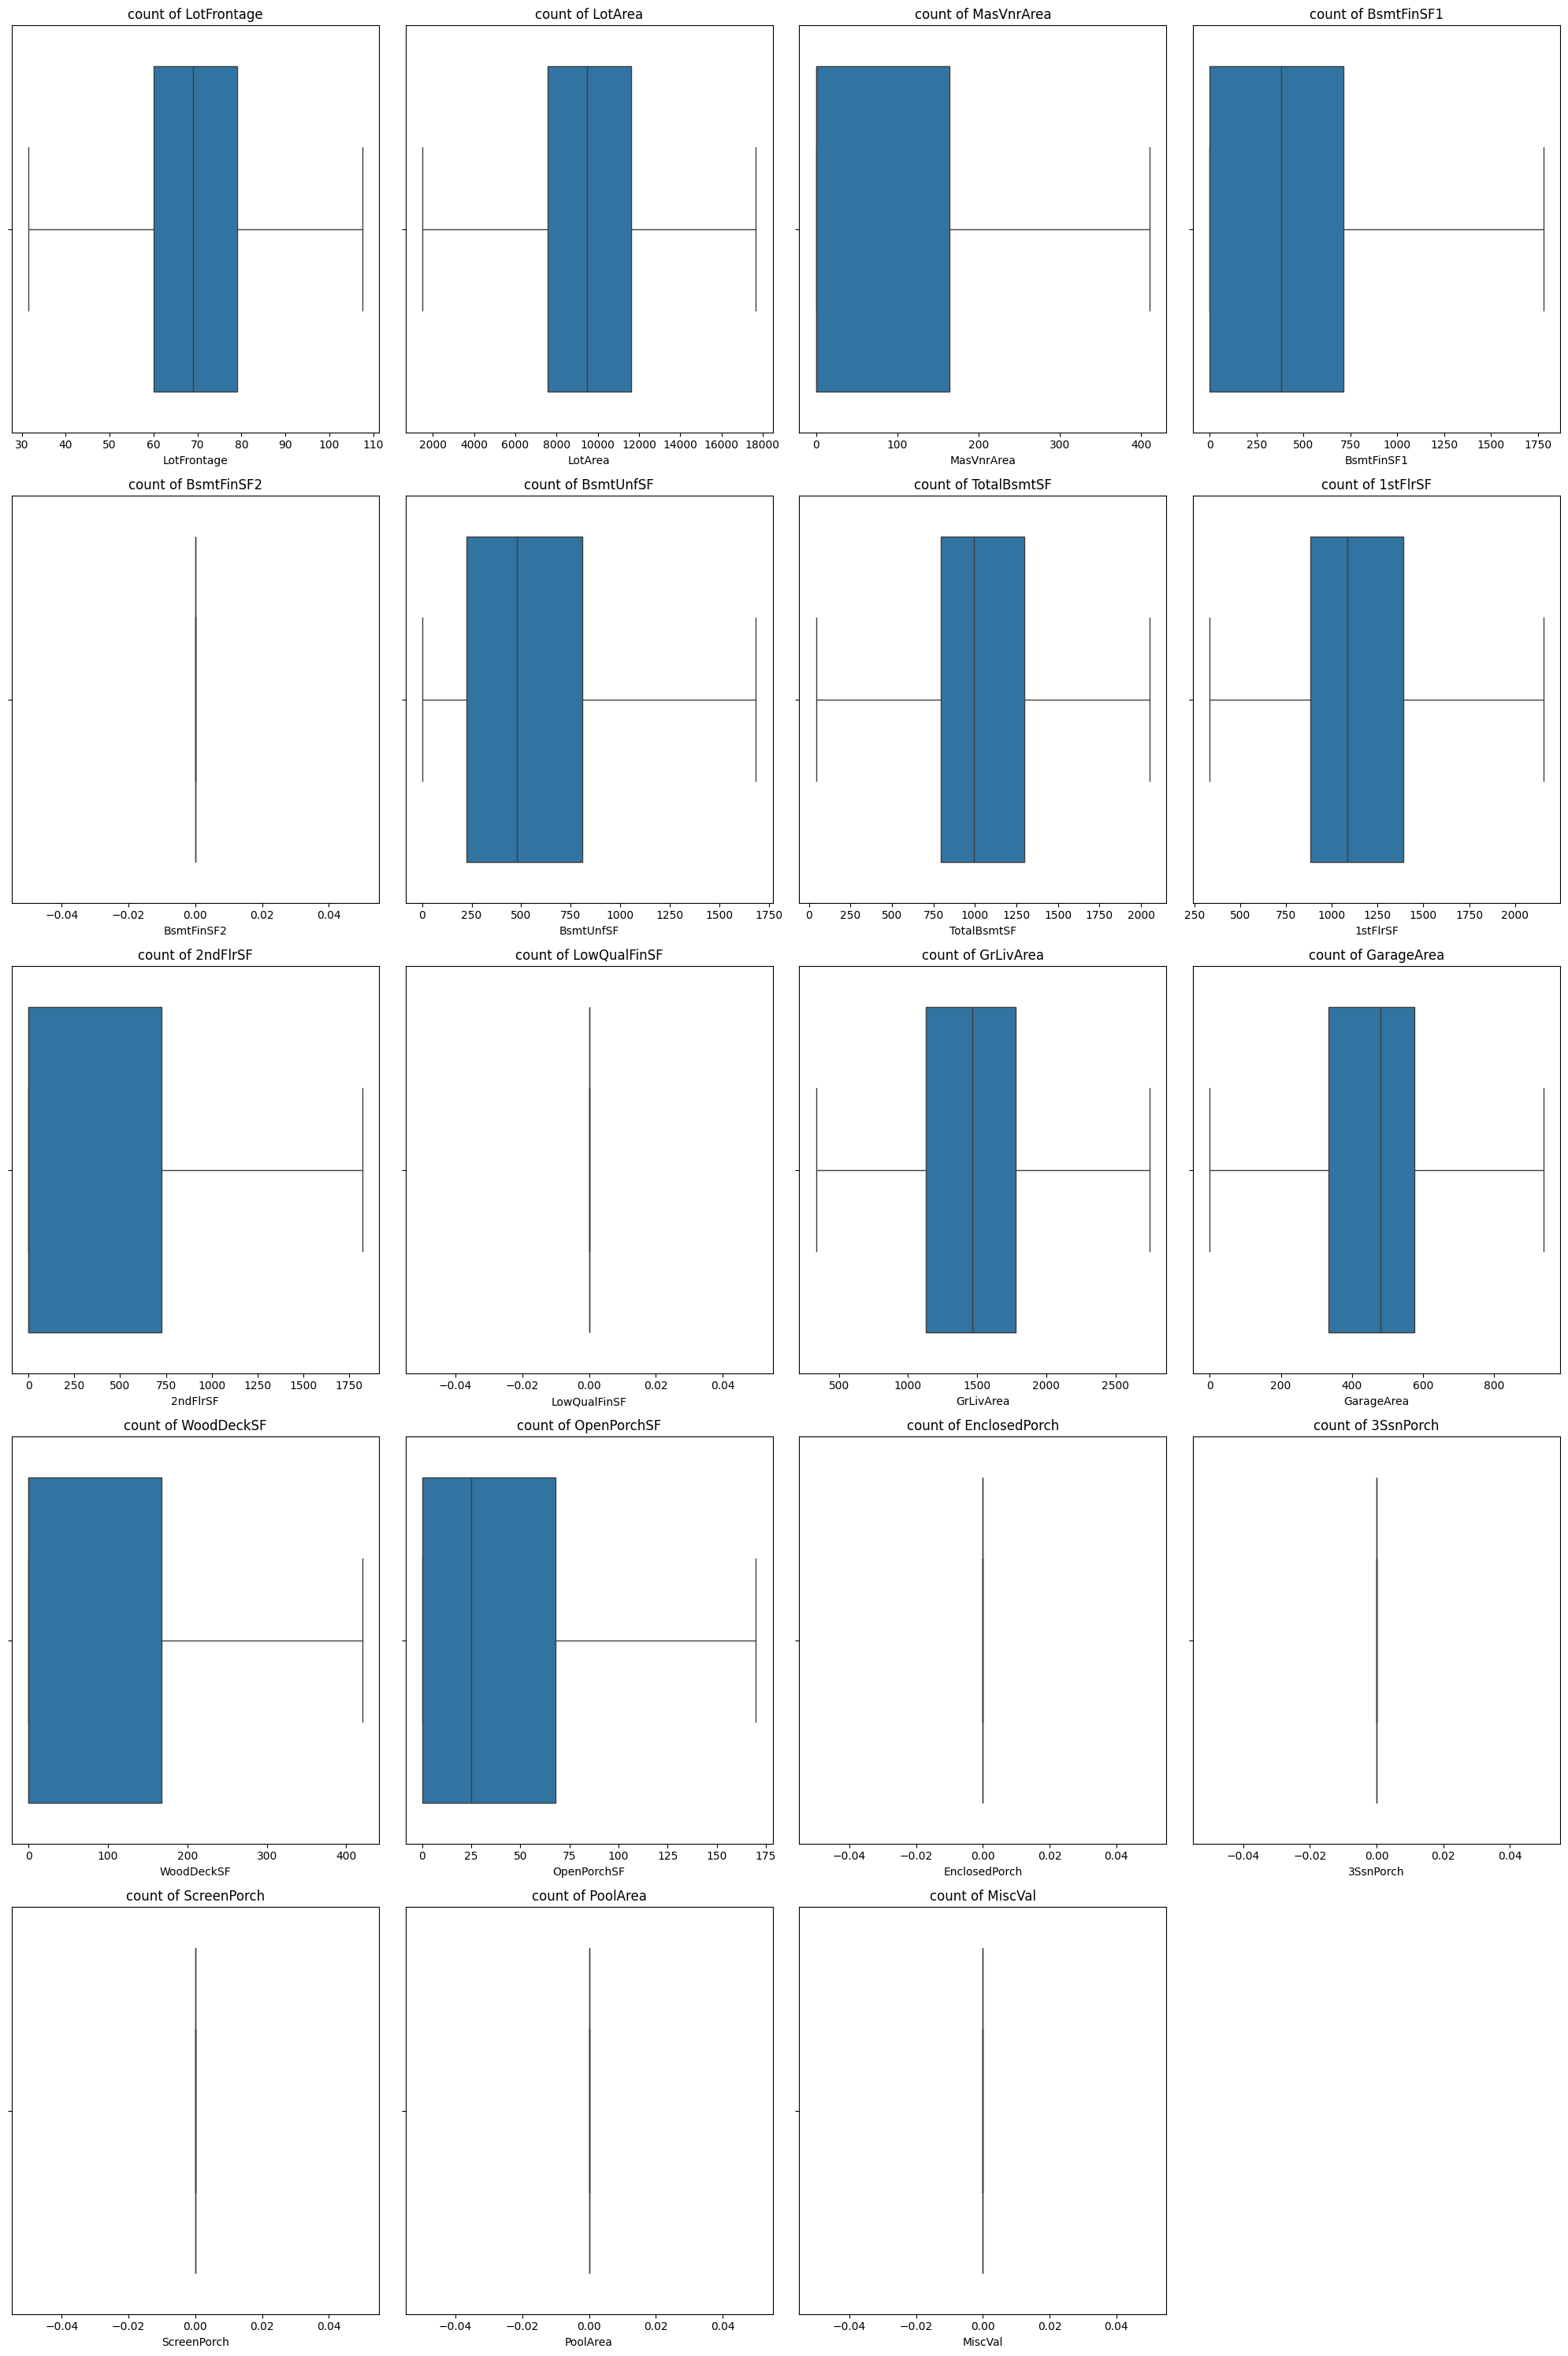

In [52]:
plt.figure(figsize=(20,30))
plot = 1 

for i in num_conti :
    if plot <= 20:
        plt.subplot(5,4,plot)
        sns.boxplot(x = i, data =df )
        plt.title(f"count of {i}")
        plot = plot + 1
plt.tight_layout()

Outlier treatment :

- Outlier handling is performed by capping technique.
- In this capping technique any value beyond 1.5 * IQR of the 25th and 75th percentiles is limited to the calculated upper/lower bounds.
- This approach handles outlier without deleting data points which helps retain sample size. Now the continuous features have less extreme outliers.

####  Scaling

In [53]:
pd.set_option("display.max_columns",None)
mm = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch','PoolArea','MiscVal',
]

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[mm] = scaler.fit_transform(df[mm])

In [55]:
df[mm]

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0        0.440789  0.430367    0.477321    0.396490         0.0   0.088994   
1        0.638158  0.501390    0.000000    0.549245         0.0   0.168496   
2        0.480263  0.603292    0.394521    0.272938         0.0   0.257490   
3        0.375000  0.498302    0.000000    0.121306         0.0   0.320380   
4        0.690789  0.789186    0.852359    0.367848         0.0   0.290715   
...           ...       ...         ...         ...         ...        ...   
1455     0.401316  0.397449    0.000000    0.000000         0.0   0.565411   
1456     0.703947  0.722178    0.289802    0.443664         0.0   0.349451   
1457     0.453947  0.466928    0.000000    0.154440         0.0   0.520320   
1458     0.480263  0.508615    0.000000    0.027518         0.0   0.000000   
1459     0.572368  0.522202    0.000000    0.466128         0.0   0.080688   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0        0.404975  0.286636  0.469231           0.0   0.570097    0.584066   
1        0.606965  0.509575  0.000000           0.0   0.384484    0.490274   
2        0.436816  0.321779  0.475824           0.0   0.601585    0.648015   
3        0.355224  0.344293  0.415385           0.0   0.572997    0.684253   
4        0.548756  0.445329  0.578571           0.0   0.772282    0.891021   
...           ...       ...       ...           ...        ...         ...   
1455     0.453234  0.339900  0.381319           0.0   0.543995    0.490274   
1456     0.746269  0.954904  0.000000           0.0   0.720493    0.532907   
1457     0.552239  0.468941  0.632967           0.0   0.831115    0.268585   
1458     0.515423  0.408539  0.000000           0.0   0.308250    0.255795   
1459     0.603980  0.506280  0.000000           0.0   0.381998    0.294165   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0       0.000000     0.358824            0.0        0.0          0.0   
1       0.709524     0.000000            0.0        0.0          0.0   
2       0.000000     0.247059            0.0        0.0          0.0   
3       0.000000     0.205882            0.0        0.0          0.0   
4       0.457143     0.494118            0.0        0.0          0.0   
...          ...          ...            ...        ...          ...   
1455    0.000000     0.235294            0.0        0.0          0.0   
1456    0.830952     0.000000            0.0        0.0          0.0   
1457    0.000000     0.352941            0.0        0.0          0.0   
1458    0.871429     0.000000            0.0        0.0          0.0   
1459    1.000000     0.400000            0.0        0.0          0.0   

      PoolArea  MiscVal  
0          0.0      0.0  
1          0.0      0.0  
2          0.0      0.0  
3          0.0      0.0  
4          0.0      0.0  
...        ...      ...  
1455       0.0      0.0  
1456       0.0      0.0  
1457       0.0      0.0  
1458       0.0      0.0  
1459       0.0      0.0  

[1460 rows x 19 columns]

Scaling :

- All selected numerical features in mm have been Min-Max Scaled.This process transforms the data such that every value for each feature now lies between 0 and 1.
- This tansformation is crucial for distance-based algorithms and models relying on gradient descent.
- The scaling makes the magnitude of features comparable, which can sometimes aid in the interpretability of coefficients or feature importance in certain models.

####  Encoding

In [56]:
# Featues are created as list for different encoding technique

onehot_features = [
    'MSSubClass',"MSZoning", "LotConfig", "Neighborhood", 
    "Condition1", "Condition2", "BldgType", "HouseStyle", 
    "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", 
    "Foundation", "Heating", "SaleType", 
    "SaleCondition", "GarageType", "LandContour", "Electrical","LandSlope"
]
label_features = [
    "CentralAir"
]
ordinal_features = [
    "LotShape",
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "BsmtExposure", "BsmtFinType1", "HeatingQC", "KitchenQual",
    "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
    "GarageCond", "PavedDrive" , "BsmtFinType2"
]

In [57]:
# Label Encoding

LE = LabelEncoder()

for i in label_features:
    df[i] = LE.fit_transform(df[i])
print(df[i])

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    1
1457    1
1458    1
1459    1
Name: CentralAir, Length: 1460, dtype: int32


In [58]:
df.BsmtQual.value_counts()

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [59]:
# Ordinal Encoding

Oe = OrdinalEncoder(categories = [
    ['IR3','IR2', 'IR1', 'Reg'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['No', 'Mn', 'Av', 'Gd'],
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Unf', 'RFn', 'Fin'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    ['N','P','Y'],
    ['Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
]
                   )
df[ordinal_features] = Oe.fit_transform(df[ordinal_features])

In [60]:
# One-Hot Encoding

for i in onehot_features:
    df = pd.get_dummies(df, columns=[i],dtype=int)

In [61]:
df

LotFrontage   LotArea  LotShape  OverallQual  OverallCond  YearBuilt  \
0        0.440789  0.430367       3.0            7            5       2003   
1        0.638158  0.501390       3.0            6            8       1976   
2        0.480263  0.603292       2.0            7            5       2001   
3        0.375000  0.498302       2.0            7            5       1915   
4        0.690789  0.789186       2.0            8            5       2000   
...           ...       ...       ...          ...          ...        ...   
1455     0.401316  0.397449       3.0            6            5       1999   
1456     0.703947  0.722178       3.0            6            6       1978   
1457     0.453947  0.466928       3.0            7            9       1941   
1458     0.480263  0.508615       3.0            5            6       1950   
1459     0.572368  0.522202       3.0            5            6       1965   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  BsmtCond  \
0             2003    0.477321        3.0        2.0       3.0       2.0   
1             1976    0.000000        2.0        2.0       3.0       2.0   
2             2002    0.394521        3.0        2.0       3.0       2.0   
3             1970    0.000000        2.0        2.0       2.0       3.0   
4             2000    0.852359        3.0        2.0       3.0       2.0   
...            ...         ...        ...        ...       ...       ...   
1455          2000    0.000000        2.0        2.0       3.0       2.0   
1456          1988    0.289802        2.0        2.0       3.0       2.0   
1457          2006    0.000000        4.0        3.0       2.0       3.0   
1458          1996    0.000000        2.0        2.0       2.0       2.0   
1459          1965    0.000000        3.0        2.0       2.0       2.0   

      BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0              0.0           5.0    0.396490           0.0         0.0   
1              3.0           4.0    0.549245           0.0         0.0   
2              1.0           5.0    0.272938           0.0         0.0   
3              0.0           4.0    0.121306           0.0         0.0   
4              2.0           5.0    0.367848           0.0         0.0   
...            ...           ...         ...           ...         ...   
1455           0.0           0.0    0.000000           0.0         0.0   
1456           0.0           4.0    0.443664           2.0         0.0   
1457           0.0           5.0    0.154440           0.0         0.0   
1458           1.0           5.0    0.027518           2.0         0.0   
1459           0.0           3.0    0.466128           1.0         0.0   

      BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  1stFlrSF  2ndFlrSF  \
0      0.088994     0.404975        4.0           1  0.286636  0.469231   
1      0.168496     0.606965        4.0           1  0.509575  0.000000   
2      0.257490     0.436816        4.0           1  0.321779  0.475824   
3      0.320380     0.355224        3.0           1  0.344293  0.415385   
4      0.290715     0.548756        4.0           1  0.445329  0.578571   
...         ...          ...        ...         ...       ...       ...   
1455   0.565411     0.453234        4.0           1  0.339900  0.381319   
1456   0.349451     0.746269        2.0           1  0.954904  0.000000   
1457   0.520320     0.552239        4.0           1  0.468941  0.632967   
1458   0.000000     0.515423        3.0           1  0.408539  0.000000   
1459   0.080688     0.603980        3.0           1  0.506280  0.000000   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0              0.0   0.570097             1             0         2         1   
1              0.0   0.384484             0             1         2         0   
2              0.0   0.601585             1             0         2         1   
3              0.0   0.572997             

Encoding :

- One Hot Encoding : Features in onehot_features list were converted into dummy variables (0 or 1 columns). This prevents the model from assuming a false ordinal relationship between categories.
- Ordinal Encoding : Features in ordinal_features list with inherent rank or order were encoded numerically. This retains the meaningful, sequential relationship between the categories
- Label Encoding: The single binary feature, CentralAir, was handled separately with a simple label encoding (likely 0 and 1), which is efficient for two-class variables.
- By doing this encoding the dataset's dimensionality has significantly increased due to the creation of many new columns from the One-Hot Encoding process. This needs to be considered for computational cost and potential multicollinearity.

####  Feature selection

Correlation of Features with SalePrice using pearson correlation
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708153
ExterQual       0.682639
KitchenQual     0.659600
BsmtQual        0.650138
GarageCars      0.640409
TotalBsmtSF     0.636999
GarageArea      0.630138
1stFlrSF        0.620743
FullBath        0.560664
GarageFinish    0.537242
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


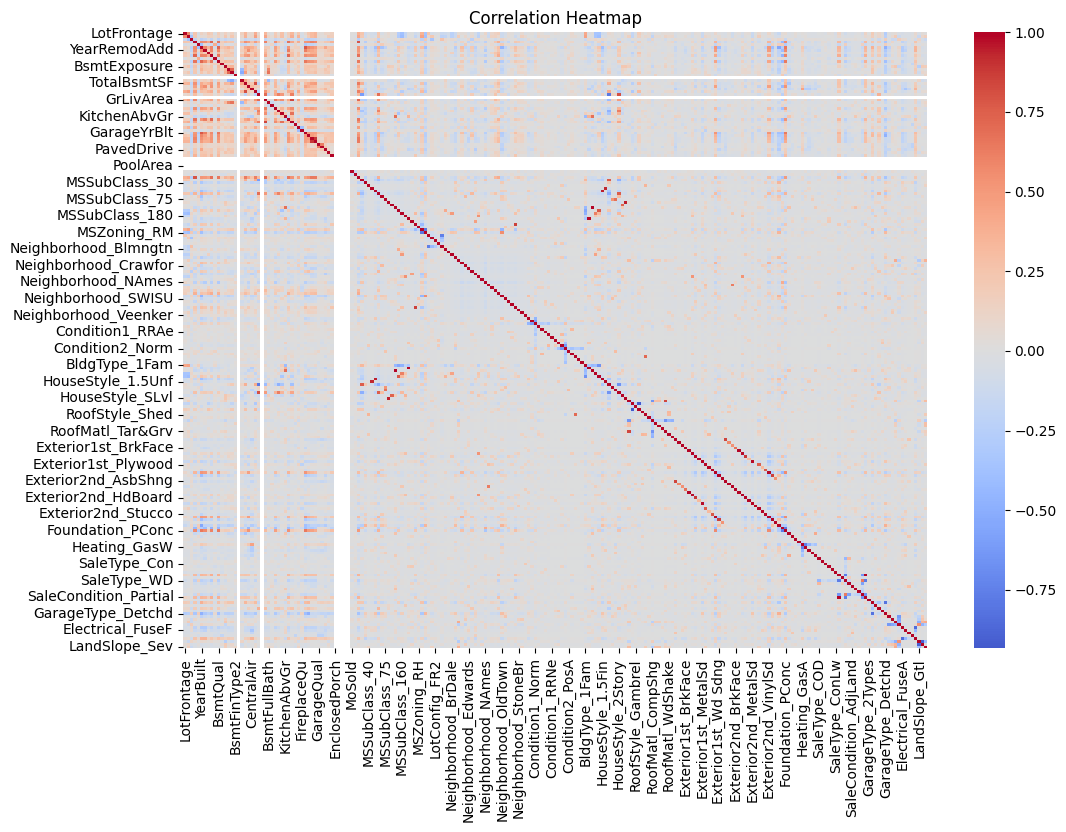

In [62]:
corr_matrix = df.corr(method='pearson')

# Sorting correlations with SalePrice
print("Correlation of Features with SalePrice using pearson correlation")
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print(corr_with_target.head(15))

# Heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) >= 0.9]
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1'] != high_corr_pairs['Column 2']]
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(high_corr_pairs)

                  Column 1               Column 2  Correlation
157     Exterior1st_CBlock     Exterior2nd_CBlock     1.000000
175     Exterior2nd_CBlock     Exterior1st_CBlock     1.000000
60           MSSubClass_90        BldgType_Duplex     1.000000
121        BldgType_Duplex          MSSubClass_90     1.000000
210           SaleType_New  SaleCondition_Partial     0.986819
218  SaleCondition_Partial           SaleType_New     0.986819
65          MSSubClass_190        BldgType_2fmCon     0.983395
119        BldgType_2fmCon         MSSubClass_190     0.983395
168    Exterior1st_VinylSd    Exterior2nd_VinylSd     0.977525
187    Exterior2nd_VinylSd    Exterior1st_VinylSd     0.977525
159    Exterior1st_CemntBd    Exterior2nd_CmentBd     0.974171
177    Exterior2nd_CmentBd    Exterior1st_CemntBd     0.974171
163    Exterior1st_MetalSd    Exterior2nd_MetalSd     0.973065
181    Exterior2nd_MetalSd    Exterior1st_MetalSd     0.973065
134        HouseStyle_SLvl          MSSubClass_80     0

#### Dropping highly correlated features to avoid redundancy and multicollinearity
- Columns with perfect correlation (1.0) – exact duplicates; one from each pair is dropped
- Columns with very high positive or negative correlation (|corr| > 0.9) – redundant or numeric-coded features; keep the more meaningful/categorical one

#### Columns dropped:
- Exterior2nd_CBlock, MSSubClass_90, SaleType_New, MSSubClass_190,
- Exterior2nd_VinylSd, Exterior2nd_CmentBd, Exterior2nd_MetalSd,
- MSSubClass_80, MSSubClass_50, RoofStyle_Gable, MSSubClass_45, LandSlope_Mod

In [64]:
cols_to_drop = [
    'Exterior2nd_CBlock', 'MSSubClass_90', 'SaleType_New',
    'MSSubClass_190', 'Exterior2nd_VinylSd', 'Exterior2nd_CmentBd',
    'Exterior2nd_MetalSd', 'MSSubClass_80', 'MSSubClass_50',
    'RoofStyle_Gable', 'MSSubClass_45', 'LandSlope_Mod'
]

In [65]:
df = df.drop(columns=cols_to_drop)

In [66]:
# Checking is there any high positive or negative correlation remaining to handle

corr_matrix = df.corr()
high_corr = corr_matrix[abs(corr_matrix) >= 0.9]
high_corr_pairs = high_corr.stack().reset_index()
high_corr_pairs.columns = ['Column 1', 'Column 2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Column 1'] != high_corr_pairs['Column 2']]
high_corr_pairs = high_corr_pairs.sort_values(by='Correlation', key=abs, ascending=False)

print(high_corr_pairs)

Empty DataFrame
Columns: [Column 1, Column 2, Correlation]
Index: []


###  Modeling

###  Spliting the Data

In [67]:
# Spliting data in dependent and independent features

X = df.drop("SalePrice",axis=1)
y = df.SalePrice

In [68]:
# Train Test Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
# Creating function to print metrics

model_metrics= {}

def evaluate_model(model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    return rmse, mae, r2

### Model Building , Validating , Evaluation with and without Hyper Parameter Tuning

#### Linear Regression

In [70]:
print("="*50)
print("1.LINEAR REGRESSION")
print("="*50)

# Creating and training the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making prediction using model
y_pred_lr = lr_model.predict(X_test)

# evaluating model using function
rmse, mae, r2  = evaluate_model(lr_model, X_test, y_test, y_pred_lr)

model_metrics['Linear_Regression'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_
}).sort_values('coefficient', key=abs, ascending=False)
print("\nTop 5 Important Features:")
print(feature_importance.head())

1.LINEAR REGRESSION
RMSE: 28610.5174
MAE: 19489.0243
R² Score: 0.8827

Top 5 Important Features:
              feature    coefficient
132  RoofMatl_ClyTile -273368.382162
22           2ndFlrSF  166839.039995
110   Condition2_PosN -166038.330427
21           1stFlrSF  145313.541825
24          GrLivArea -102059.425959


#### Ridge Regression

In [71]:
print("="*50)
print("2.RIDGE REGRESSION")
print("="*50)

# Ridge Regression model creation and training without tuning
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(ridge_model, X, y_test, y_pred_ridge)

model_metrics['Ridge_Regression_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Ridge Regression model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
ridge_params = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}
ridge_grid = GridSearchCV(Ridge(random_state=42), ridge_params, 
                         cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print(f"Best parameters: {ridge_grid.best_params_}")
y_pred_ridge_tuned = ridge_grid.predict(X_test)
rmse, mae, r2 = evaluate_model(ridge_grid.best_estimator_, X_test, y_test, y_pred_ridge_tuned)

model_metrics['Ridge_Regression_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

best_ridge = ridge_model

ridge_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 Positive Coefficients (Ridge):")
print(ridge_coef.head(10))

print("\nTop 10 Negative Coefficients (Ridge):")
print(ridge_coef.tail(10))

2.RIDGE REGRESSION

Model Implementation Without Tuning:
RMSE: 29121.3629
MAE: 19006.6247
R² Score: 0.8785

Model Implementation With Hyperparameter Tuning:
Best parameters: {'alpha': 10.0}
RMSE: 29712.0884
MAE: 18774.0886
R² Score: 0.8735

Top 10 Positive Coefficients (Ridge):
                  Feature   Coefficient
22               2ndFlrSF  80270.152733
160   Exterior2nd_ImStucc  59900.411577
139      RoofMatl_WdShngl  59776.333868
21               1stFlrSF  53058.906373
14             BsmtFinSF1  40621.456130
94   Neighborhood_StoneBr  36742.516897
18            TotalBsmtSF  32323.136171
87   Neighborhood_NoRidge  30531.207241
88   Neighborhood_NridgHt  28957.517026
107      Condition2_Feedr  24829.214765

Top 10 Negative Coefficients (Ridge):
                  Feature    Coefficient
83   Neighborhood_Mitchel  -14039.491303
86    Neighborhood_NWAmes  -14312.586429
79   Neighborhood_Edwards  -14824.348158
190  SaleCondition_Family  -15310.821087
62       MSZoning_C (all)  -15789.672

#### Lasso Regression

In [72]:
print("="*50)
print("3.LASSO REGRESSION")
print("="*50)

# Lasso Regression model creation and training without tuning
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(lasso_model, X_test, y_test, y_pred_lasso)

model_metrics['Lasso_Regression_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# lasso Regression model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_grid = GridSearchCV(Lasso(random_state=42), lasso_params, 
                         cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print(f"Best parameters: {lasso_grid.best_params_}")
y_pred_lasso_tuned = lasso_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(lasso_grid.best_estimator_, X_test, y_test, y_pred_lasso_tuned)

model_metrics['Lasso_Regression_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Features selected by Lasso
selected_features = X.columns[lasso_grid.best_estimator_.coef_ != 0]
print(f"\nFeatures selected by Lasso: {len(selected_features)}/{len(X.columns)}")

best_ridge = lasso_model

ridge_coef = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': best_ridge.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 10 Positive Coefficients (Ridge):")
print(ridge_coef.head(10))

print("\nTop 10 Negative Coefficients (Ridge):")
print(ridge_coef.tail(10))


3.LASSO REGRESSION

Model Implementation Without Tuning:
RMSE: 28356.9419
MAE: 19293.0145
R² Score: 0.8848

Model Implementation With Hyperparameter Tuning:
Best parameters: {'alpha': 10.0}
RMSE: 27919.5834
MAE: 18820.1565
R² Score: 0.8883

Features selected by Lasso: 164/210

Top 10 Positive Coefficients (Ridge):
                  Feature    Coefficient
22               2ndFlrSF  166646.967579
21               1stFlrSF  145116.015286
160   Exterior2nd_ImStucc   66734.409710
14             BsmtFinSF1   60596.769999
139      RoofMatl_WdShngl   54365.476595
94   Neighborhood_StoneBr   42187.539694
107      Condition2_Feedr   40238.245382
88   Neighborhood_NridgHt   33194.784725
150     Exterior1st_Stone   31759.014977
87   Neighborhood_NoRidge   30848.312607

Top 10 Negative Coefficients (Ridge):
                 Feature    Coefficient
102      Condition1_RRAe  -18065.013032
142  Exterior1st_BrkComm  -20688.656420
135       RoofMatl_Metal  -24712.990242
161    Exterior2nd_Other  -30248.6

####  Decision Tree Regressor

In [73]:
print("="*50)
print("4.DECISION TREE REGRESSOR")
print("="*50)

# Decision Tree Regressor model creation and training without tuning
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(dt_model, X_test, y_test, y_pred_dt)

model_metrics['Desicion_Tree_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Decision Tree Regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
dt_params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, 
                      cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f"Best parameters: {dt_grid.best_params_}")
y_pred_dt_tuned = dt_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(dt_grid.best_estimator_, X_test, y_test, y_pred_dt_tuned)
model_metrics['Desicion_Tree_Regressor_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

4.DECISION TREE REGRESSOR

Model Implementation Without Tuning:
RMSE: 42385.5562
MAE: 27898.5502
R² Score: 0.7425

Model Implementation With Hyperparameter Tuning:
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
RMSE: 35497.3944
MAE: 24770.5852
R² Score: 0.8194


#### Random Forest Regressor

In [74]:
print("="*50)
print("5.RANDOM FOREST REGRESSOR")
print("="*50)

# random Forest Regressor model creation and training without tuning
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(rf_model, X_test, y_test, y_pred_rf)

model_metrics['Random_Forest_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nTop 5 Important Features:")
print(feature_importance_rf.head())

# random Forest Regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), rf_params, 
                      cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

print(f"Best parameters: {rf_grid.best_params_}")
y_pred_rf_tuned = rf_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(rf_grid.best_estimator_, X_test, y_test, y_pred_rf_tuned)

model_metrics['Random_Forest_Regressor_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}


5.RANDOM FOREST REGRESSOR

Model Implementation Without Tuning:
RMSE: 25587.1026
MAE: 16330.2783
R² Score: 0.9062

Top 5 Important Features:
        feature  importance
3   OverallQual    0.536676
24    GrLivArea    0.111713
22     2ndFlrSF    0.040920
18  TotalBsmtSF    0.030924
21     1stFlrSF    0.030372

Model Implementation With Hyperparameter Tuning:
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 25694.5346
MAE: 16263.2327
R² Score: 0.9054


#### Gradient Boosting Regressor

In [75]:
print("="*50)
print("6.GRADIENT BOOSTING REGRESSOR")
print("="*50)

from sklearn.ensemble import GradientBoostingRegressor

# Gradient Bossting Regressor model creation and training without tuning
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(gb_model, X_test, y_test, y_pred_gb)

model_metrics['Gradient_Boosting_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Gradient Boosting Regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
gb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, 
                      cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(X_train, y_train)

print(f"Best parameters: {gb_grid.best_params_}")
y_pred_gb_tuned = gb_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(gb_grid.best_estimator_, X_test, y_test, y_pred_gb_tuned)

model_metrics['Gradient_Boosting_Regressor_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

6.GRADIENT BOOSTING REGRESSOR

Model Implementation Without Tuning:
RMSE: 24094.4212
MAE: 15747.8003
R² Score: 0.9168

Model Implementation With Hyperparameter Tuning:
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
RMSE: 23991.4991
MAE: 15307.0733
R² Score: 0.9175


####  XGBoost Regressor

In [76]:
print("="*80)
print("7.XGBOOST REGRESSOR")
print("="*80)

from xgboost import XGBRegressor

# XGboost Regressor model creation and training without tuning
xgb_model = XGBRegressor(random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(xgb_model, X_test, y_test, y_pred_xgb)

model_metrics['XGBoost_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# XGboost Regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
xgb_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42, n_jobs=-1), xgb_params, 
                       cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_best = xgb_grid.best_estimator_

print(f"Best parameters: {xgb_grid.best_params_}")
y_pred_xgb_tuned = xgb_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(xgb_grid.best_estimator_, X_test, y_test, y_pred_xgb_tuned)

model_metrics['XGBoost_Regressor_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}\


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_best.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance.head(10))

7.XGBOOST REGRESSOR

Model Implementation Without Tuning:
RMSE: 24704.5719
MAE: 16828.9361
R² Score: 0.9125

Model Implementation With Hyperparameter Tuning:
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
RMSE: 22703.7813
MAE: 15012.0353
R² Score: 0.9261
             Feature  Importance
3        OverallQual    0.165026
8          ExterQual    0.140411
38        GarageCars    0.105485
10          BsmtQual    0.035148
24         GrLivArea    0.032823
199  LandContour_Bnk    0.031906
27          FullBath    0.031292
55     MSSubClass_60    0.026495
37      GarageFinish    0.023646
34        Fireplaces    0.022339


####  SVR

In [77]:
print("="*50)
print("8.SUPPORT VECTOR REGRESSION (SVR)")
print("="*50)

from sklearn.svm import SVR

# Support Vector Regressor model creation and training without tuning
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(svr_model, X_test, y_test, y_pred_svr)

model_metrics['Support_Vector_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# Support Vector Regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
svr_params = {
    'kernel': ['rbf', 'linear'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}
svr_grid = GridSearchCV(SVR(), svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)

print(f"Best parameters: {svr_grid.best_params_}")
y_pred_svr_tuned = svr_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(svr_grid.best_estimator_, X_test, y_test, y_pred_svr_tuned)

model_metrics['Support_Vector_Regressor_with_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

8.SUPPORT VECTOR REGRESSION (SVR)

Model Implementation Without Tuning:
RMSE: 84872.3442
MAE: 57046.9262
R² Score: -0.0323

Model Implementation With Hyperparameter Tuning:
Best parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
RMSE: 56358.1244
MAE: 32632.2893
R² Score: 0.5448


#### KNN Regressor

In [78]:
print("="*50)
print("9.K-NEAREST NEIGHBORS REGRESSOR")
print("="*50)

from sklearn.neighbors import KNeighborsRegressor

# K-nearest neighbors regressor model creation and training without tuning
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("\nModel Implementation Without Tuning:")
rmse, mae, r2  = evaluate_model(knn_model, X_test, y_test, y_pred_knn)

model_metrics['KNN_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# K-nearest neighbors regressor model creation and training with hyper parameter tuning
print("\nModel Implementation With Hyperparameter Tuning:")
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, 
                       cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)

print(f"Best parameters: {knn_grid.best_params_}")
y_pred_knn_tuned = knn_grid.predict(X_test)
rmse, mae, r2  = evaluate_model(knn_grid.best_estimator_, X_test, y_test, y_pred_knn_tuned)

model_metrics['KNN_Regressor_without_Tuning'] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

9.K-NEAREST NEIGHBORS REGRESSOR

Model Implementation Without Tuning:
RMSE: 44974.3566
MAE: 31088.9662
R² Score: 0.7101

Model Implementation With Hyperparameter Tuning:
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
RMSE: 38648.1524
MAE: 25194.2977
R² Score: 0.7859


###  Model Evaluation By Comparing R2 Score , RMSE , MAE etc.

In [79]:
model_metrics

{'Linear_Regression': {'RMSE': 28610.51743990689,
  'MAE': 19489.024279207384,
  'R2': 0.8826955130982603},
 'Ridge_Regression_without_Tuning': {'RMSE': 29121.36291944014,
  'MAE': 19006.62465883838,
  'R2': 0.8784691339298387},
 'Ridge_Regression_with_Tuning': {'RMSE': 29712.088404173493,
  'MAE': 18774.08862996549,
  'R2': 0.8734886306230158},
 'Lasso_Regression_without_Tuning': {'RMSE': 28356.941936299085,
  'MAE': 19293.01454480383,
  'R2': 0.8847656418032427},
 'Lasso_Regression_with_Tuning': {'RMSE': 27919.58342707409,
  'MAE': 18820.156540841937,
  'R2': 0.8882928253121634},
 'Desicion_Tree_Regressor_without_Tuning': {'RMSE': 42385.556181661304,
  'MAE': 27898.5502283105,
  'R2': 0.7425463981459974},
 'Desicion_Tree_Regressor_with_Tuning': {'RMSE': 35497.394357421814,
  'MAE': 24770.5851876888,
  'R2': 0.819425612590693},
 'Random_Forest_Regressor_without_Tuning': {'RMSE': 25587.102561935386,
  'MAE': 16330.278333333332,
  'R2': 0.9061778416937074},
 'Random_Forest_Regressor_wit

In [80]:
metrics_df = pd.DataFrame(model_metrics).T
metrics_df.columns = ['RMSE', 'MAE', 'R2']
metrics_df = metrics_df.sort_values(by='R2', ascending=False)
metrics_df = metrics_df.round({'MSE': 2, 'RMSE': 2, 'R2': 4})
metrics_df = metrics_df.reset_index().rename(columns={'index': 'Model'})
print("\nModel Performance Metrics (Sorted by R²):")
print(metrics_df.to_string(index=False))


Model Performance Metrics (Sorted by R²):
                                     Model     RMSE          MAE      R2
             XGBoost_Regressor_with_Tuning 22703.78 15012.035308  0.9261
   Gradient_Boosting_Regressor_with_Tuning 23991.50 15307.073250  0.9175
Gradient_Boosting_Regressor_without_Tuning 24094.42 15747.800294  0.9168
          XGBoost_Regressor_without_Tuning 24704.57 16828.936055  0.9125
    Random_Forest_Regressor_without_Tuning 25587.10 16330.278333  0.9062
       Random_Forest_Regressor_with_Tuning 25694.53 16263.232705  0.9054
              Lasso_Regression_with_Tuning 27919.58 18820.156541  0.8883
           Lasso_Regression_without_Tuning 28356.94 19293.014545  0.8848
                         Linear_Regression 28610.52 19489.024279  0.8827
           Ridge_Regression_without_Tuning 29121.36 19006.624659  0.8785
              Ridge_Regression_with_Tuning 29712.09 18774.088630  0.8735
       Desicion_Tree_Regressor_with_Tuning 35497.39 24770.585188  0.8194
        

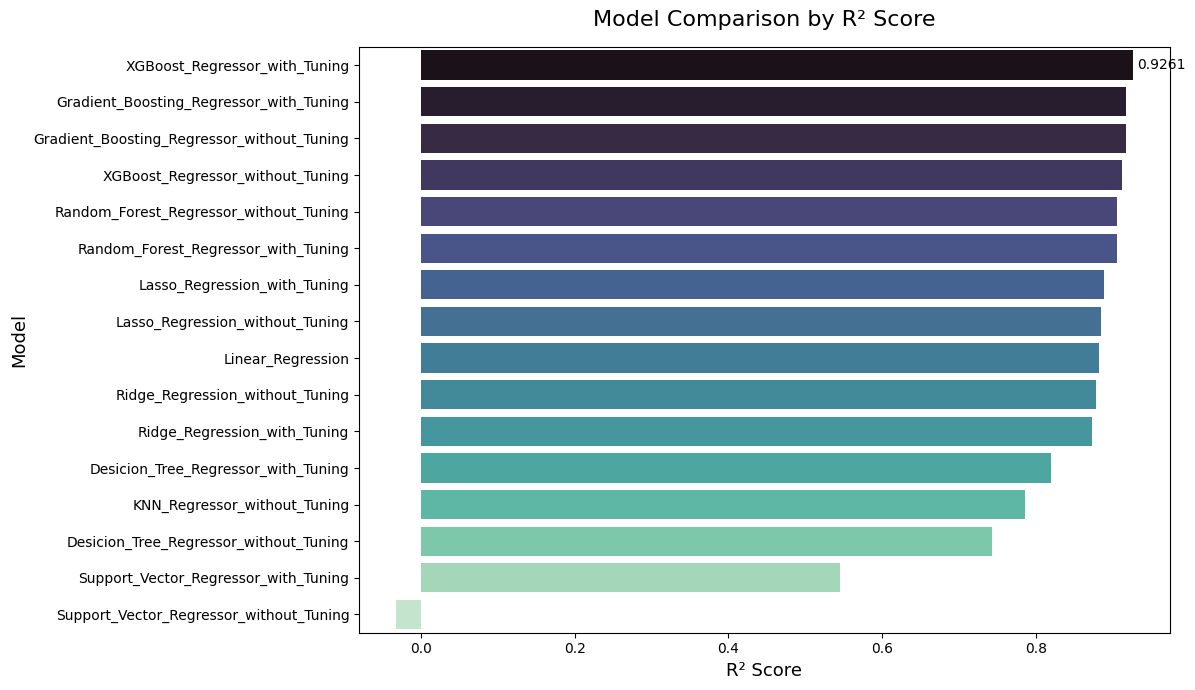

In [81]:
sorted_df = metrics_df.sort_values(by='R2', ascending=False)

plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=sorted_df,
    y='Model',
    x='R2',
    palette='mako'
)
ax.set_title('Model Comparison by R² Score', fontsize=16, pad=15)
ax.set_xlabel('R² Score', fontsize=13)
ax.set_ylabel('Model', fontsize=13)
ax.bar_label(ax.containers[0], fmt='%.4f', padding=3)  # Add values on bars
plt.tight_layout()
plt.show()

###  Best Model Based On R2 Score , MSE , RMSE , MAE etc.

In [82]:
best_row = metrics_df.loc[metrics_df['R2'].idxmax()]
best_model_name = best_row['Model']
best_model_metrics = best_row[['RMSE', 'MAE', 'R2']]
print("="*45)
print(f"\nBest Model: {best_model_name}")
print("="*45)
print(best_model_metrics.to_string())


Best Model: XGBoost_Regressor_with_Tuning
RMSE        22703.78
MAE     15012.035308
R2            0.9261


## Report On Modeling :

- The Aim Of the problem is to develop a robust machine learning model capable  of acccurately predicting house prices based on various housing and neighborhood features.
- For doing this task we perfomed process that is explained by below steps,
    1. **Feature Engineering** :
        - The First step of Feature Engineering data processing was done.
        - The Data set is preprocessed by handling null values , data cleaning ,  outlier handling , encoding categorical features and scaling numerical variables.
        - In Second step feature selection is done based on heatmap or correlatioon between features.
    2. **Splitting the dataset** :
        - The dataset is splitted in target feature and rem,aining feature first than using train test split the data set is splitted into training and testing data.
    3. **Model Training** :
        - In Model Training a wide range of machine learning algorithm were implemented:
            1. Linear Regression
            2. Ridge Regression (with & without hyperparameter tuning)
            3. Lasso Regression (with & without hyperparameter tuning)
            4. Decision Tree Regressor (with & without tuning)
            5. Random Forest Regressor (with & without tuning)
            6. Gradient Boosting Regressor (with & without tuning)
            7. XGBoost Regressor (with & without tuning)
            8. Support Vector Regressor
            9. K-Nearest Neighbors Regressor
    4. **Hypoerparameter Tuning** :
        - For Models like Ridge , Lasso , Decision Tree , Random Forest , Gradient Boosting and XGBoost , hyper parameter tuning was performed using GridSearchCV
        - Cross Validation was applied in models to avoid overfitting and ensure better generalization.
    5. **Model Evaluation** :
        - The models were evaluated using three key metrics:
            1. R² Score – measures the proportion of variance explained by the model.
            2. RMSE (Root Mean Squared Error) – penalizes large errors.
            3. MAE (Mean Absolute Error) – shows average prediction error          
        - We provided one table above to compare the performance based on R2 Score , MAE , RMSE.
        - From the all models that are implemented the XGBoost Regressor with hyperparameter tuning gives best performance by giving highest R2 Score and lowest RMSE and MAE.
        - This indicates that the model explains 92.6% of the variance in house prices and provides highly accurate predictions.

## Report On Feature Relationship Analysis :

- Understanding how different housing features influence prices is essential for making the model interpretable and extracting meaningful business insights.
- For this task some Analysis is performed like,
    1. *Feature Importance(XGBosst)* :
    - Using the trained XGBoost model, feature importance scores were calculated to identify the most impactful variables. The top predictors influencing house prices were:
        - OverallQual – Overall material and finish quality
        - GrLivArea – Above-ground living area
        - GarageCars – Garage capacity (number of cars)
        - YearBuilt – Year the house was constructed
        - TotalBsmtSF – Total basement area
    2. *Correlation Heatmap* :
        - Pearson correlation analysis revealed strong positive correlations between OverallQual, GrLivArea, and SalePrice, highlighting their significant impact on pricing.
        - On the other hand, several other features showed weaker or negative correlations, indicating a relatively lower influence on house prices.
    3. *Model Coefficients (Linear Models)* :
        - Coefficient analysis from Ridge and Lasso models supported these findings. Features related to quality and size consistently showed the strongest positive impact on price, confirming their importance in both linear and tree-based models.

## Customer Buying Suggestion :

- Based on what our model learned from analyzing thousands of house sales, here are practical tips to help you make smarter buying decisions.
- **Getting More Value**
    - Not all neighborhoods are created equal. Some areas have spacious, well-built homes at reasonable prices, while others charge a premium just for the location. If you're watching your budget, it's worth exploring these undervalued neighborhoods. You might get a bigger house or better quality for the same money you'd spend elsewhere.
- **What Actually Matters When Buying**
    - Focus on two things first: how well-built the house is and how much living space it has. These are the biggest drivers of value and will make the biggest difference to your investment. A large, well-maintained house will hold its value much better than a poorly maintained one, regardless of other features.
    - Nice-to-haves like garage size and basement area do add value, but they're secondary. Don't overpay for these extras if you're cutting it close on budget. A solid house in good condition matters way more than having space for four cars in the garage.
- **Smart Investment Picks**
    - If you're thinking long-term, look for properties that combine two things: they're in neighborhoods where prices have been steadily climbing, and the house itself is in good condition. These tend to appreciate nicely over time. Avoid betting on a "fixer-upper" unless you're confident it'll appreciate faster than the repair costs.
- **Finding Your Perfect Match**
Rather than spending hours scrolling through listings, you can use this trained XGBoost model to filter and recommend properties based on user-input criteria like budget, preferred area, and key feature.

## Conclusion , Difficulties And Future Work :

**Conclusion** :
- Building this machine learning pipeline taught us that predicting house prices isn't just about applying algorithms—it's about understanding what actually drives real estate value.
- We tested several models and eventually landed on XGBoost with fine-tuned hyperparameters, which gave us an R² score of 0.926. That level of accuracy means the model captures the underlying patterns pretty well, making it genuinely useful for predictions.
- What stood out from our analysis was which features mattered most:
    - Overall Quality - The overall condition and quality rating
    - Living Area (GrLivArea) - Above-grade living space square footage
    - Garage Cars - Number of cars that can fit in the garage
    - Year Built - The construction year of the property
    - Total Basement Area (TotalBsmtSF) - Total basement square footage
- These consistently proved to be the strongest indicators of price. This aligns with what we know intuitively about real estate—people care about size, condition, age, and functionality. Armed with these insights, we can now guide potential buyers toward factors that will actually impact their investment.

**Challenges We Faced** :
- The road to this final model wasn't smooth, and it's worth being honest about the obstacles we encountered. Getting solid data was harder than expected—we had to deal with missing values scattered throughout different features, outliers that didn't make sense (like houses with unusually extreme prices or features), and inconsistencies that required careful investigation.Feature engineering consumed a lot of time; we spent hours figuring out which transformations would actually help the model learn better.
- Model tuning was another time sink. Hyperparameter optimization isn't a one-shot process—we ran through dozens of combinations, cross-validated everything, and dealt with the frustration of overfitting and underfitting cycles. Sometimes a model would look great on training data but perform poorly on test data, forcing us to step back and rethink the approach. Adding regularization techniques helped, but it meant balancing model complexity with real-world performance.
- There was also the challenge of interpreting results. With multiple models performing differently, deciding which one to actually deploy required not just looking at metrics, but understanding why certain models worked better and what assumptions we were making. False confidence in a model can be dangerous when real money is involved.



**Future Work** :
- There's definitely room to take this further. Real estate markets are influenced by things we haven't tapped into yet:
- Enhanced Data & Features:
    - Nearby schools, local amenities, neighborhood crime rates, and transportation access all shape property values. Pulling in those external datasets could meaningfully improve our predictions and provide a more holistic view of what determines property worth.
- Advanced Modeling:
    - We're curious whether deep learning approaches might capture more complex patterns that traditional models miss. More sophisticated architectures could potentially uncover subtle interactions between features that affect pricing in ways we haven't discovered yet.
- Real-World Deployment:
    - Turning this into something people can actually use makes sense. A web app or mobile interface where buyers can input property details and get real-time price estimates would be genuinely valuable. We'd want to keep updating the model as new market data comes in too—prices shift, trends evolve, and a model that worked six months ago might not be as sharp today.